# Perkenalan

Nama : Salman Faishal

Batch : FTDS-017-RMT

Dataset: churn dataset

Obj : membuat prediksi apakah pelanggan akan tetap berlangganan atau tidak

Deployment : [Churn Prediction](https://huggingface.co/spaces/salmanfaishal27/churn-prediction)

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout
import pickle
from feature_engine.outliers import Winsorizer

# Data Loading

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('churn.csv')
data.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


In [4]:
data.shape

(37010, 22)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [6]:
data = data.drop(columns='user_id')

# Exploratory Data Analysis (EDA)

## churn_risk_score

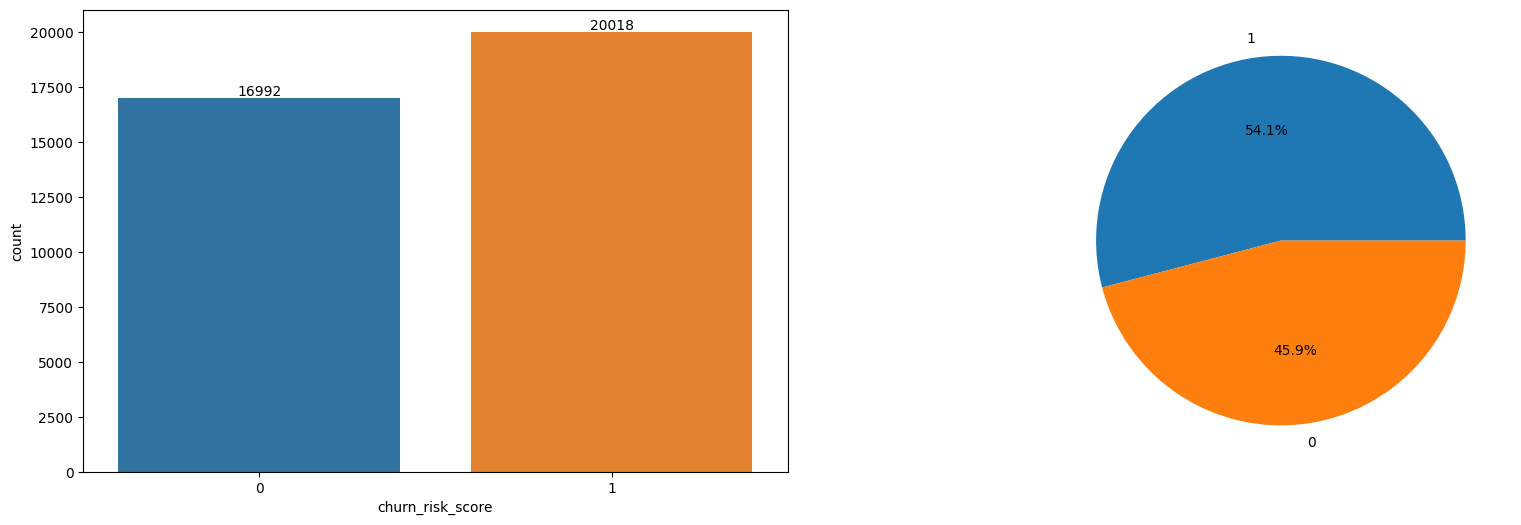

In [7]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax = sns.countplot(x='churn_risk_score', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,2,2)
plt.pie(data.churn_risk_score.value_counts(), labels= data.churn_risk_score.value_counts().index, autopct = '%1.1f%%')
plt.show()

pada kolom churn_risk_score atau target ini terdapat 2 label yaitu 0 dan 1 dimana 0 adalah Not churn(pelanggan tidak pergi) dan 1 adalah Churn (kehilangan pelanggan), pada plot yang ditampilkan terdapat 16992 atau 46% untuk pelanggan yang tidak meninggalkan perusahaan dan 20018 atau 54% unntuk pelanggan yang meninggalkan perusahaan.

## age

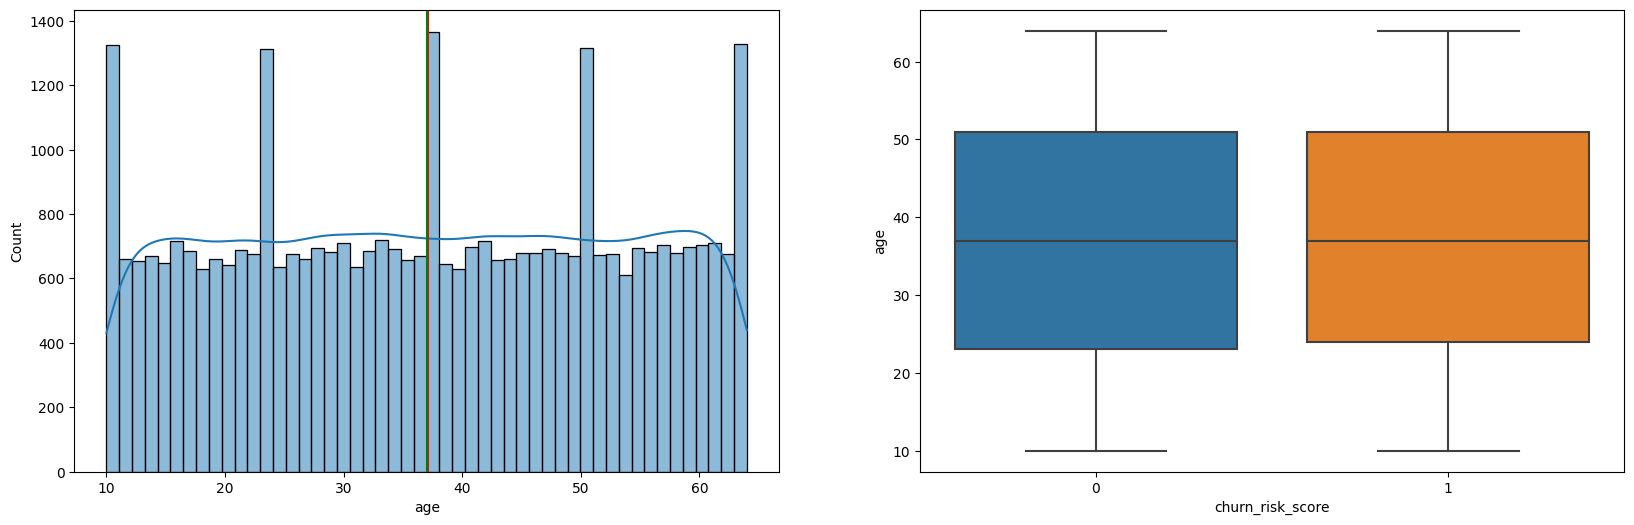

Skewness : -0.007528816521120494
Mean : 37.12069710888949
Median : 37.0


In [8]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(x='age', bins=50, kde = True, data = data)
plt.axvline(data.age.mean(), color='r', label = 'Mean')
plt.axvline(data.age.median(), color='g', label = 'Median')

plt.subplot(1,2,2)
sns.boxplot(x='churn_risk_score', y='age', data = data)
plt.show()

print('Skewness :', data.age.skew())
print('Mean :', data.age.mean())
print('Median :', data.age.median())

rata rata pelanggan berusia 37 tahun, histogram diatas memiliki distribusi yang normal karena memiliki nilai skewness -0.0075 dimana nilai tersebut berada di antara -0.5 dan 0.5, jika dilihat dari boxplot tidak terlihat ada hubungan antara kolom age dan churn_risk_score

## Gender

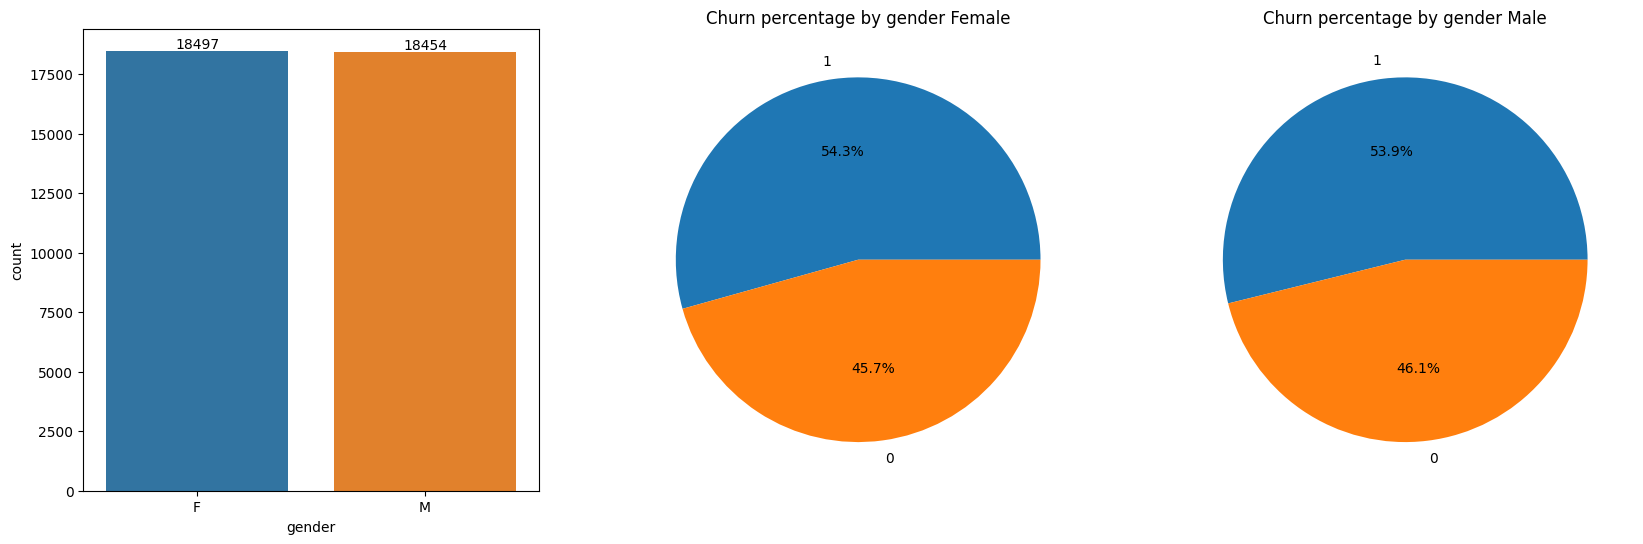

In [9]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
ax = sns.countplot(x='gender', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,3,2)
plt.pie(data[data.gender == 'F'].churn_risk_score.value_counts(), labels= data[data.gender == 'F'].churn_risk_score.value_counts().index, autopct = '%1.1f%%')
plt.title('Churn percentage by gender Female')

plt.subplot(1,3,3)
plt.pie(data[data.gender == 'M'].churn_risk_score.value_counts(), labels= data[data.gender == 'M'].churn_risk_score.value_counts().index, autopct = '%1.1f%%')
plt.title('Churn percentage by gender Male')
plt.show()

perbandingan jenis kelamin pelanggan antara wanita dan pria hanya berbeda 0.2% dimana wanita berjumlah 18495 atau 50.1% dan wanita berjumlah 18454 atau 49.9%, dari grafik terakhir dapat dilihat baik pelanggan pria atau wanita kebanyakan meninggalkan perusahaan atau churn

## region_category 

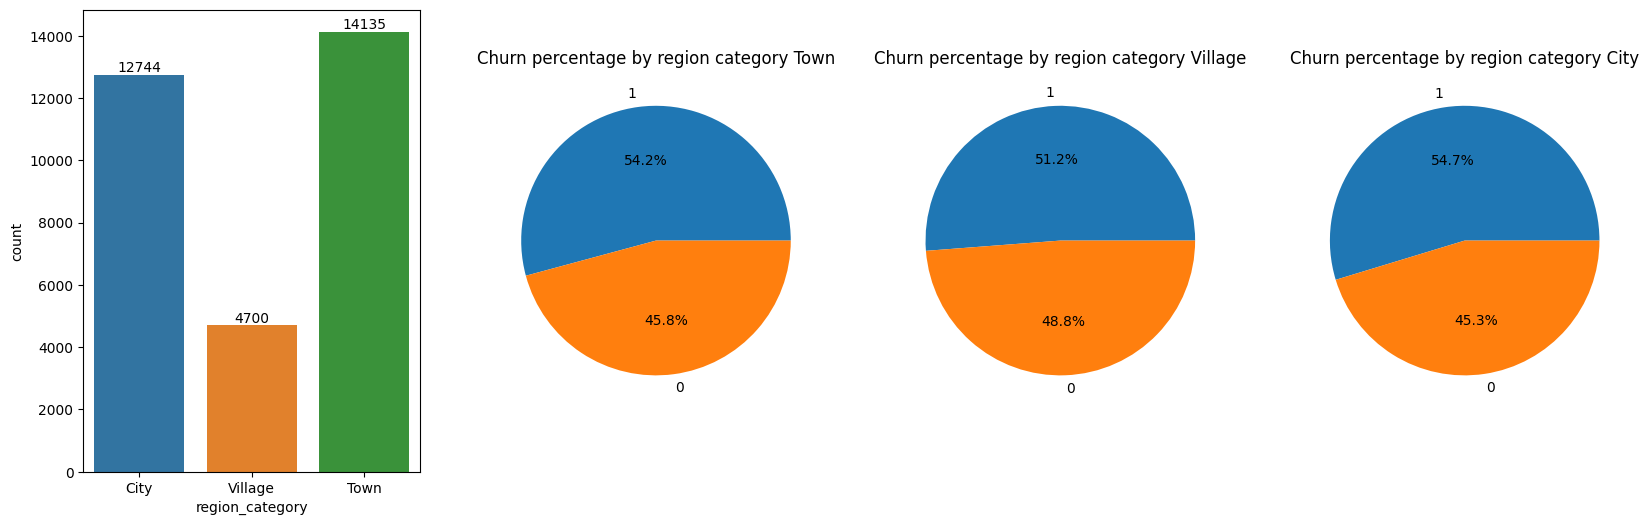

In [10]:
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
ax = sns.countplot(x='region_category', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,4,2)
plt.pie(data[data.region_category == 'Town'].churn_risk_score.value_counts(), labels= data[data.region_category == 'Town'].churn_risk_score.value_counts().index, autopct = '%1.1f%%')
plt.title('Churn percentage by region category Town')

plt.subplot(1,4,3)
plt.pie(data[data.region_category == 'Village'].churn_risk_score.value_counts(), labels= data[data.region_category == 'Village'].churn_risk_score.value_counts().index, autopct = '%1.1f%%')
plt.title('Churn percentage by region category Village')

plt.subplot(1,4,4)
plt.pie(data[data.region_category == 'City'].churn_risk_score.value_counts(), labels= data[data.region_category == 'City'].churn_risk_score.value_counts().index, autopct = '%1.1f%%')
plt.title('Churn percentage by region category City')
plt.show()



kebanyakan pelanggan berada di Town dengan jumlah 14135 atau 35% dan paling rendah berada di village dengan jumlah pelanggan 4700 atau 15%, dari setiap region ini kebanyakan pelanggan meninggalkan perusahaan atau churn

## membership_category

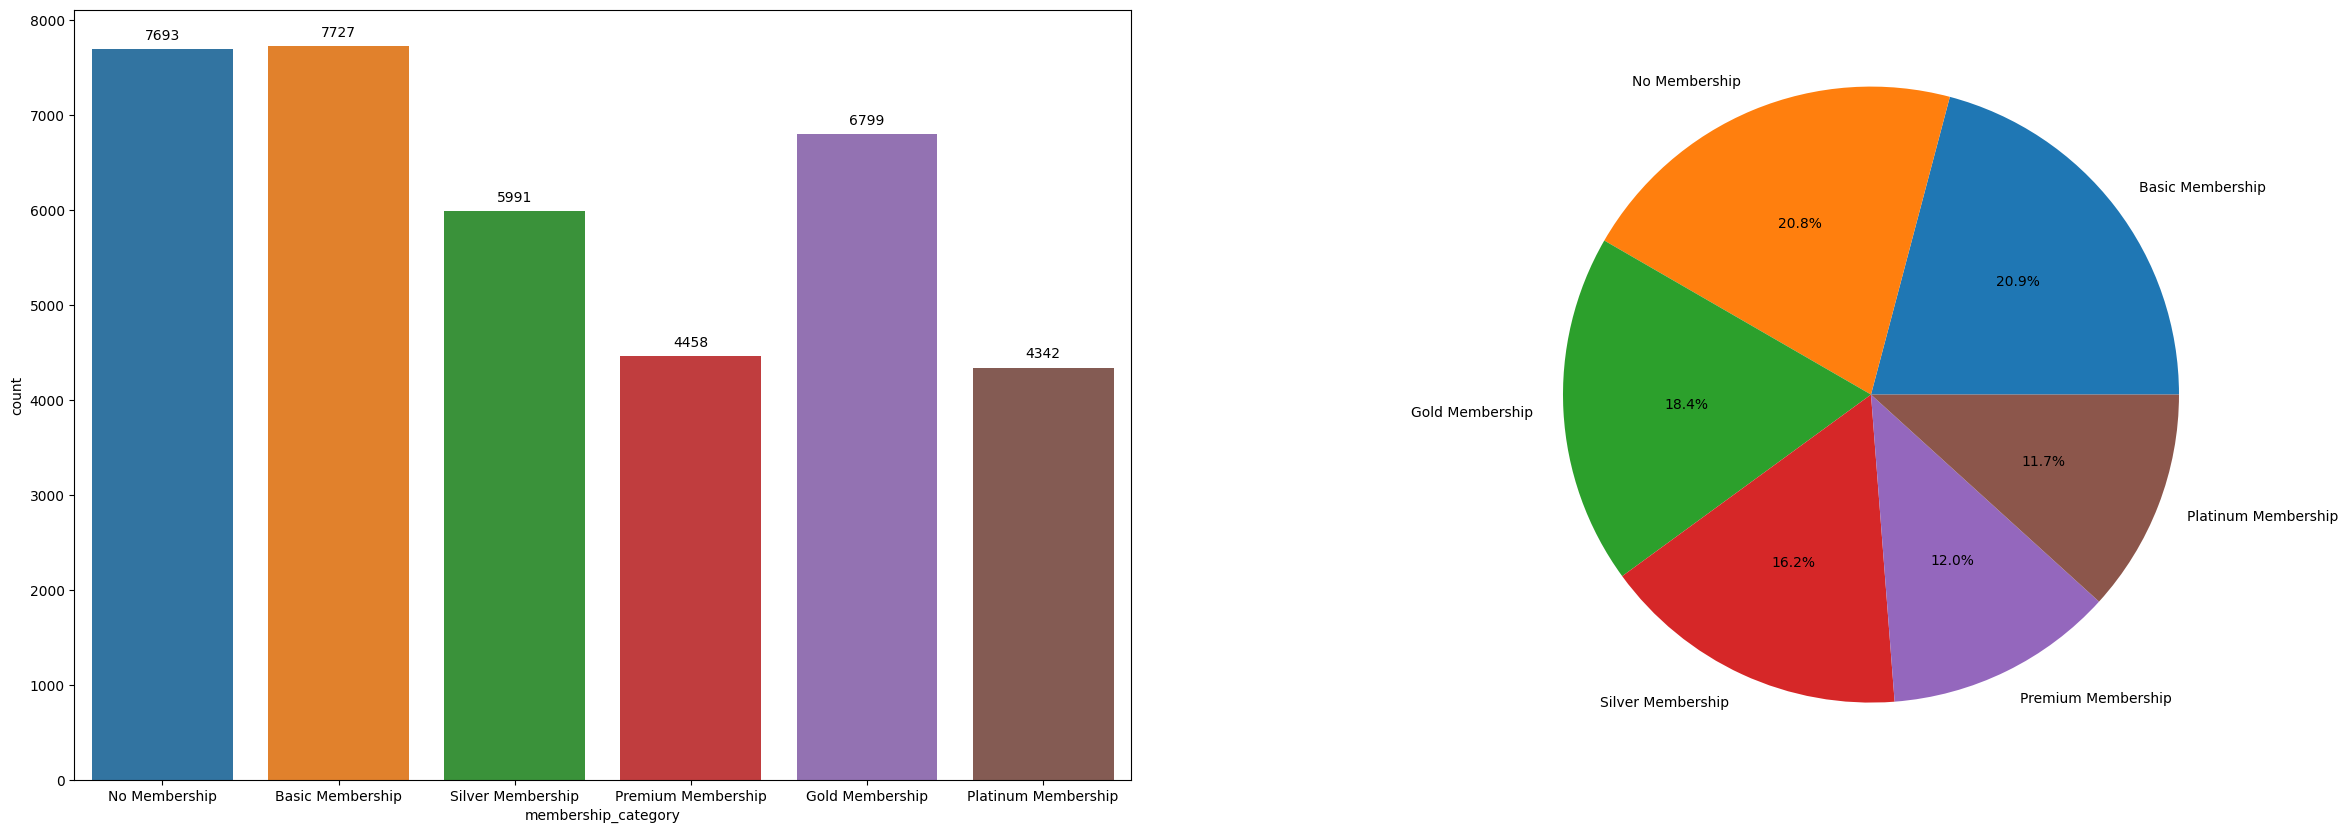

In [11]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
ax = sns.countplot(x='membership_category', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,2,2)
plt.pie(data.membership_category.value_counts(), labels= data.membership_category.value_counts().index, autopct = '%1.1f%%')
plt.show()

Dari grafik diatas dapat jumlah pelanggan jika diurutkan dari kategori terendah sampai tertinggi :
- No Membership sebanyak 7693 atau 20.8%
- Basic Membership sebanyak 7727 atau 20.9%
- Silver Membership sebanyak 5991 atau 16.2%
- Gold Membership sebanyak 6799 atau 18.4%
- Premium Membership sebanyak 4458 atau 12%
- Platinum Membership sebanyak 4342 atau 11.7%
  
Basic Membership adalah kategori member paling banyak dan paling sedikit adalah kategori member platinum

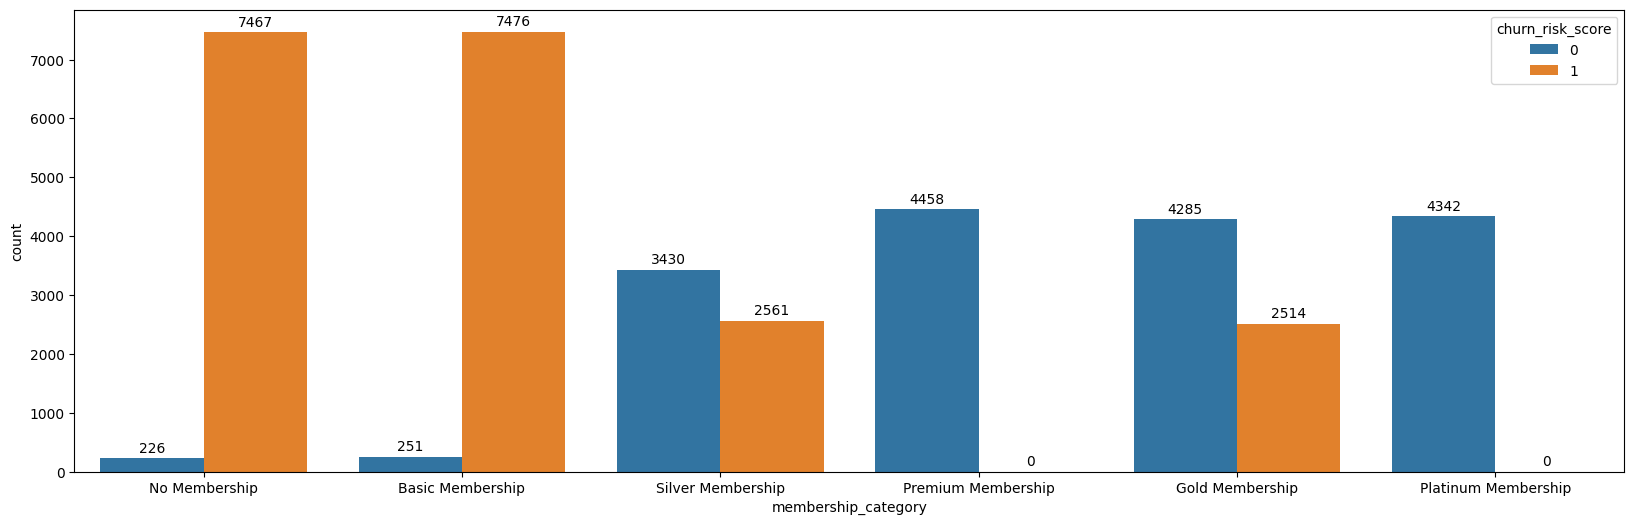

In [12]:
plt.figure(figsize=(20,6))
ax = sns.countplot(x='membership_category', hue='churn_risk_score',data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

kebanyakan pelanggan yang meninggalkan perushaan (churn) memiliki kategori member yang rendah sehingga dapat disimpulkan bahwa semakin tinggi member maka pelanggan tidak akan meninggalkan perushaan karena pelanggan mempercayai perushaan dapat dilihat pada 2 kategori tertinggi yaitu premium dan platinum, pelanggan pelanggan dengan kategori premium dan platinum tidak ada yang meninggalkan perusahaan atau tetap menjadi pelanggan (Not churn).

## joined_through_referral

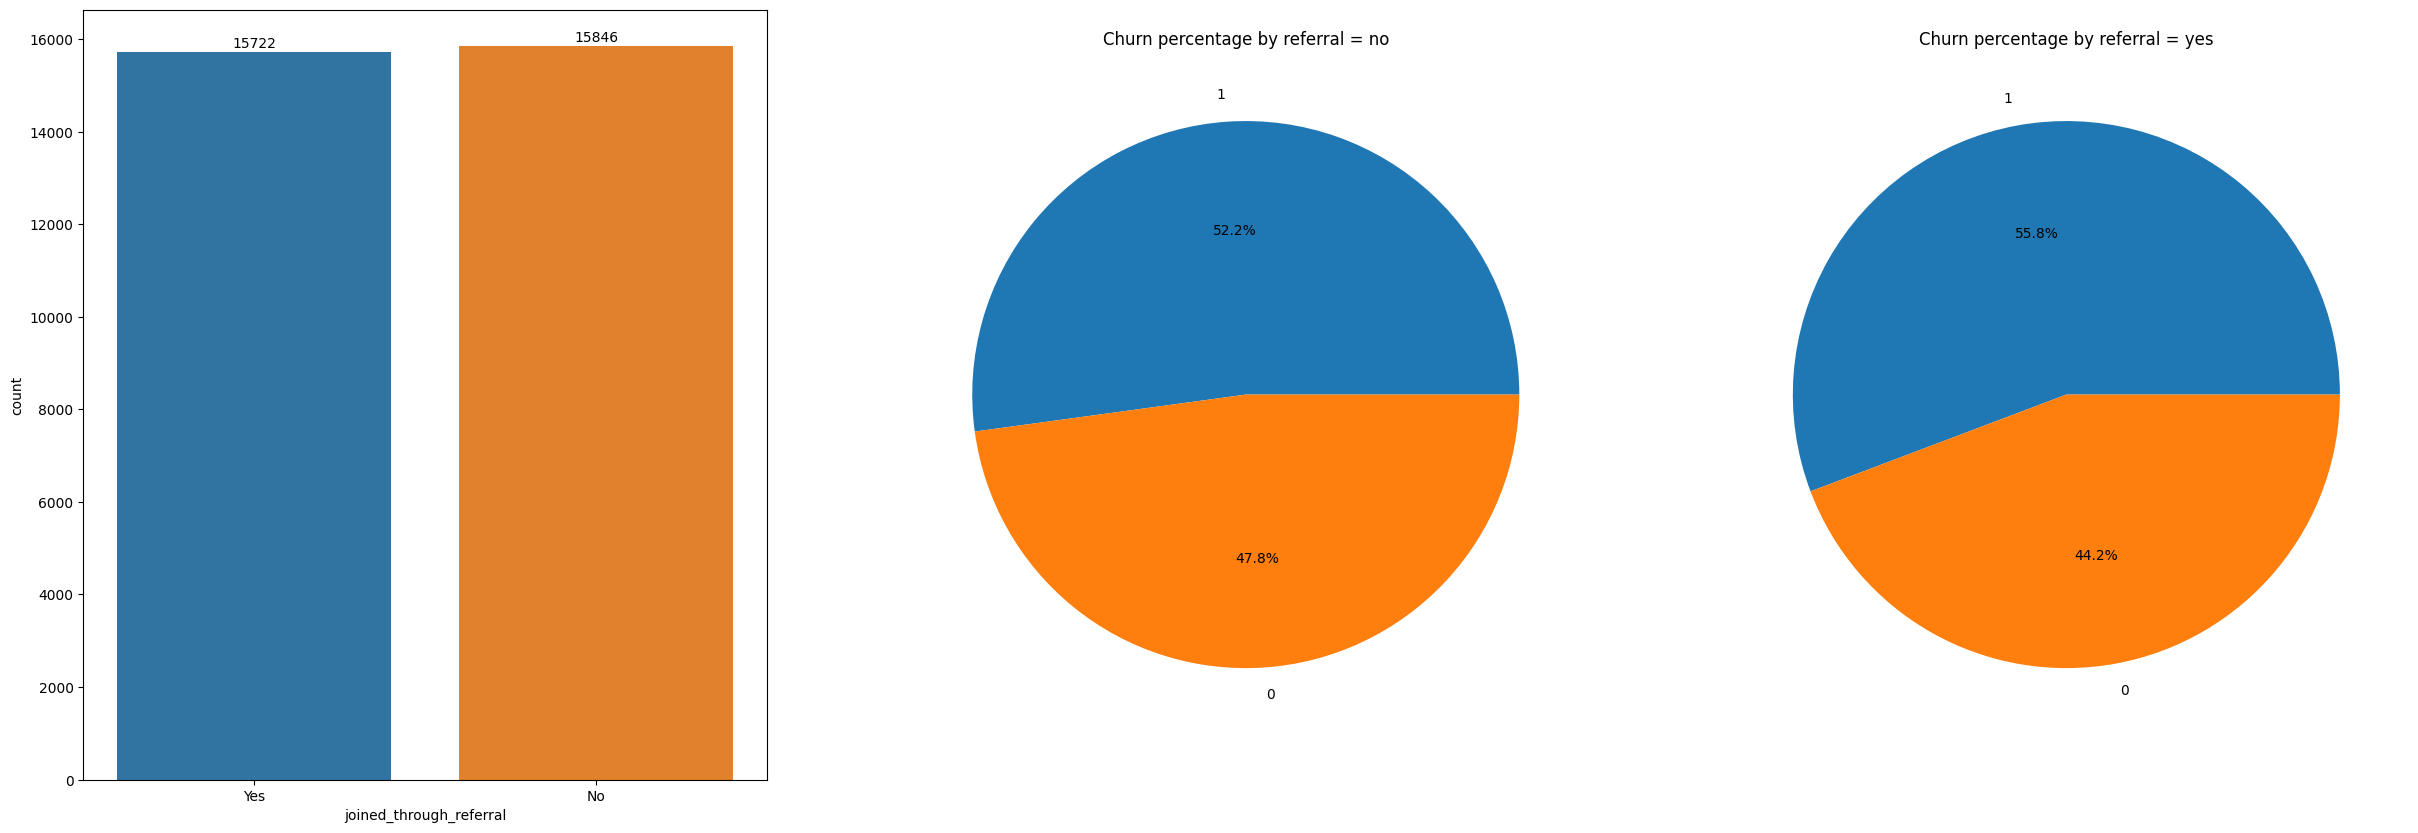

In [13]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
ax = sns.countplot(x='joined_through_referral', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,3,2)
plt.pie(data[data.joined_through_referral == 'No'].churn_risk_score.value_counts(), labels= data[data.joined_through_referral == 'No'].churn_risk_score.value_counts().index, autopct = '%1.1f%%')
plt.title('Churn percentage by referral = no')

plt.subplot(1,3,3)
plt.pie(data[data.joined_through_referral == 'Yes'].churn_risk_score.value_counts(), labels= data[data.joined_through_referral == 'Yes'].churn_risk_score.value_counts().index, autopct = '%1.1f%%')
plt.title('Churn percentage by referral = yes')
plt.show()

pada countplot diatas perbandingan antara pelanggan yang berlangganan menggunakan referral dan tidak kurang lebih sama, dan pada pie chart kebanyakan pelanggan yang churn terdapat pada pelanggan yang menggunakan referral dengan persentasi 56%

## preferred_offer_types

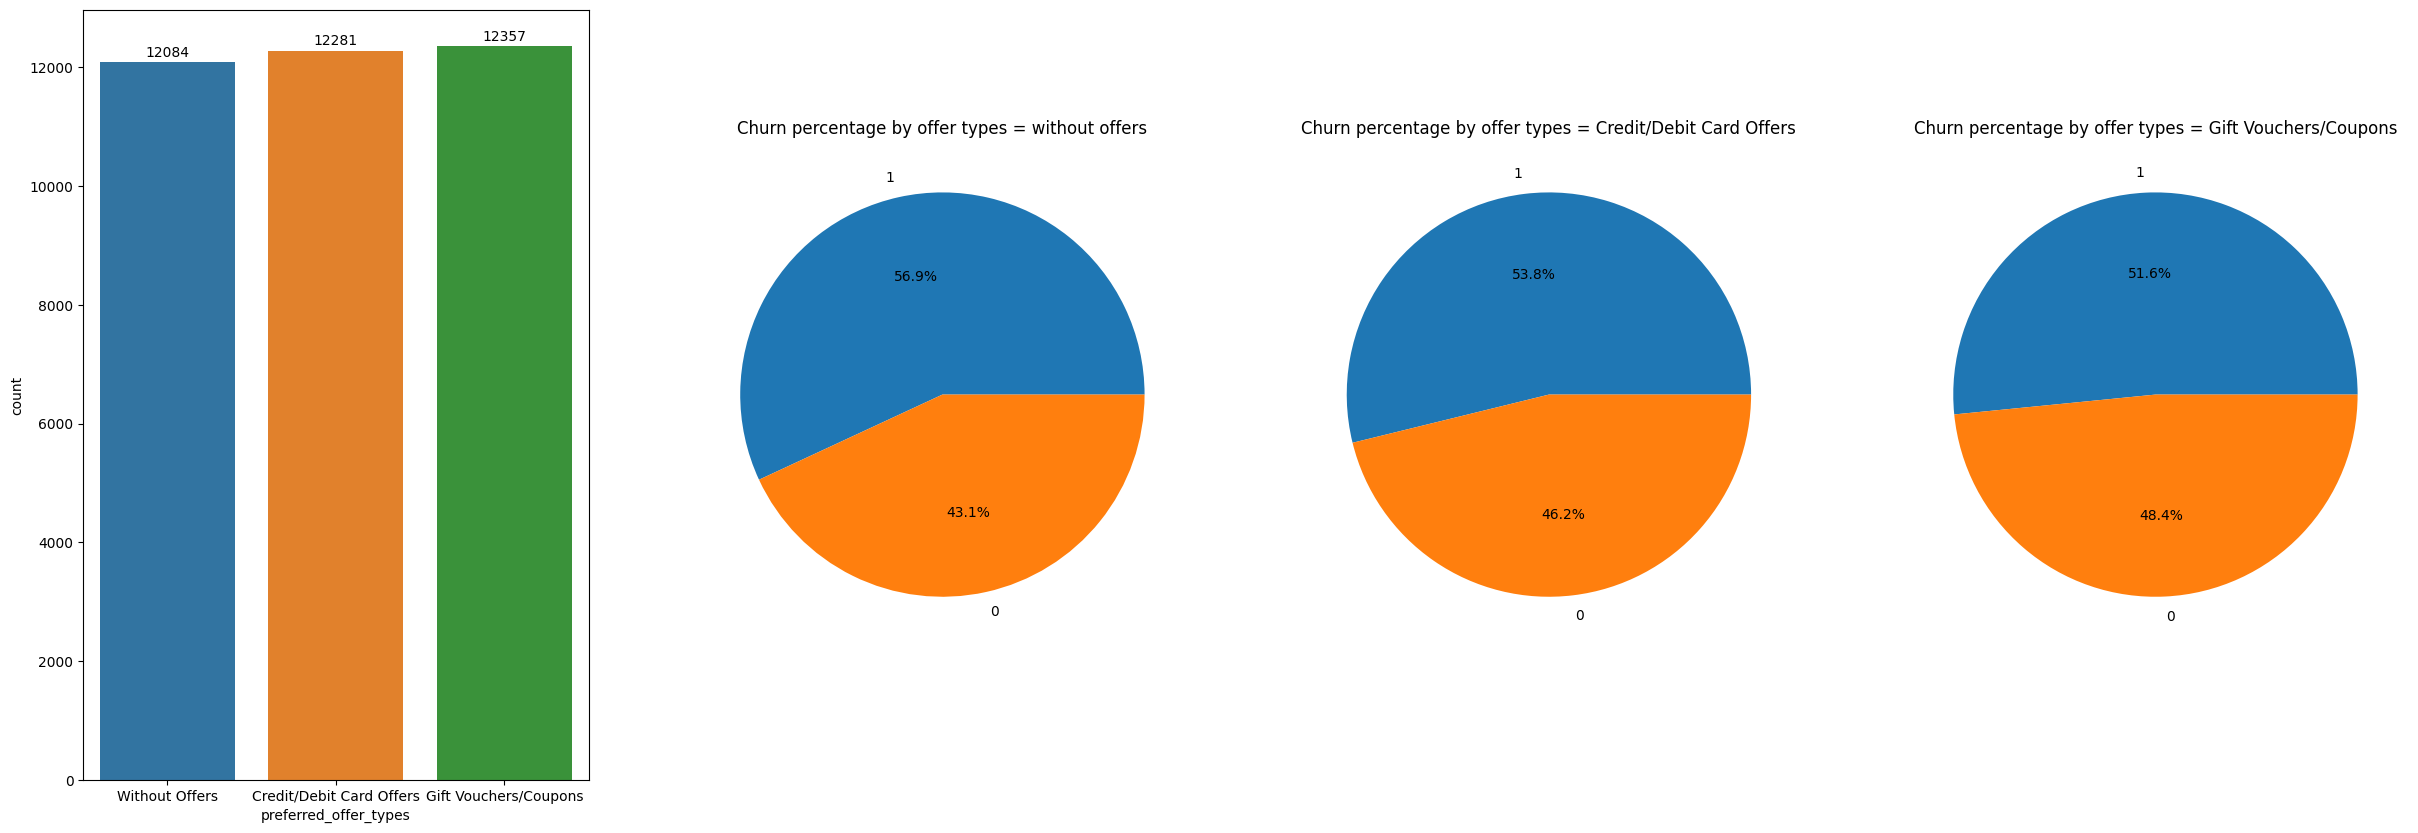

In [14]:
plt.figure(figsize=(30,10))
plt.subplot(1,4,1)
ax = sns.countplot(x='preferred_offer_types', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,4,2)
plt.pie(data[data.preferred_offer_types == 'Without Offers'].churn_risk_score.value_counts(), labels= data[data.preferred_offer_types == 'Without Offers'].churn_risk_score.value_counts().index, autopct = '%1.1f%%')
plt.title('Churn percentage by offer types = without offers')

plt.subplot(1,4,3)
plt.pie(data[data.preferred_offer_types == 'Credit/Debit Card Offers'].churn_risk_score.value_counts(), labels= data[data.preferred_offer_types == 'Credit/Debit Card Offers'].churn_risk_score.value_counts().index, autopct = '%1.1f%%')
plt.title('Churn percentage by offer types = Credit/Debit Card Offers')

plt.subplot(1,4,4)
plt.pie(data[data.preferred_offer_types == 'Gift Vouchers/Coupons'].churn_risk_score.value_counts(), labels= data[data.preferred_offer_types == 'Gift Vouchers/Coupons'].churn_risk_score.value_counts().index, autopct = '%1.1f%%')
plt.title('Churn percentage by offer types = Gift Vouchers/Coupons')
plt.show()

kebanyakan pelanggan menyukai penawaran Gift vouchers/coupons sebanyak 12357, namun meskipun sudah diberikan menawaran baik gift card ataupun credit lebih dari 50% para pelanggan churn

## medium_of_operation

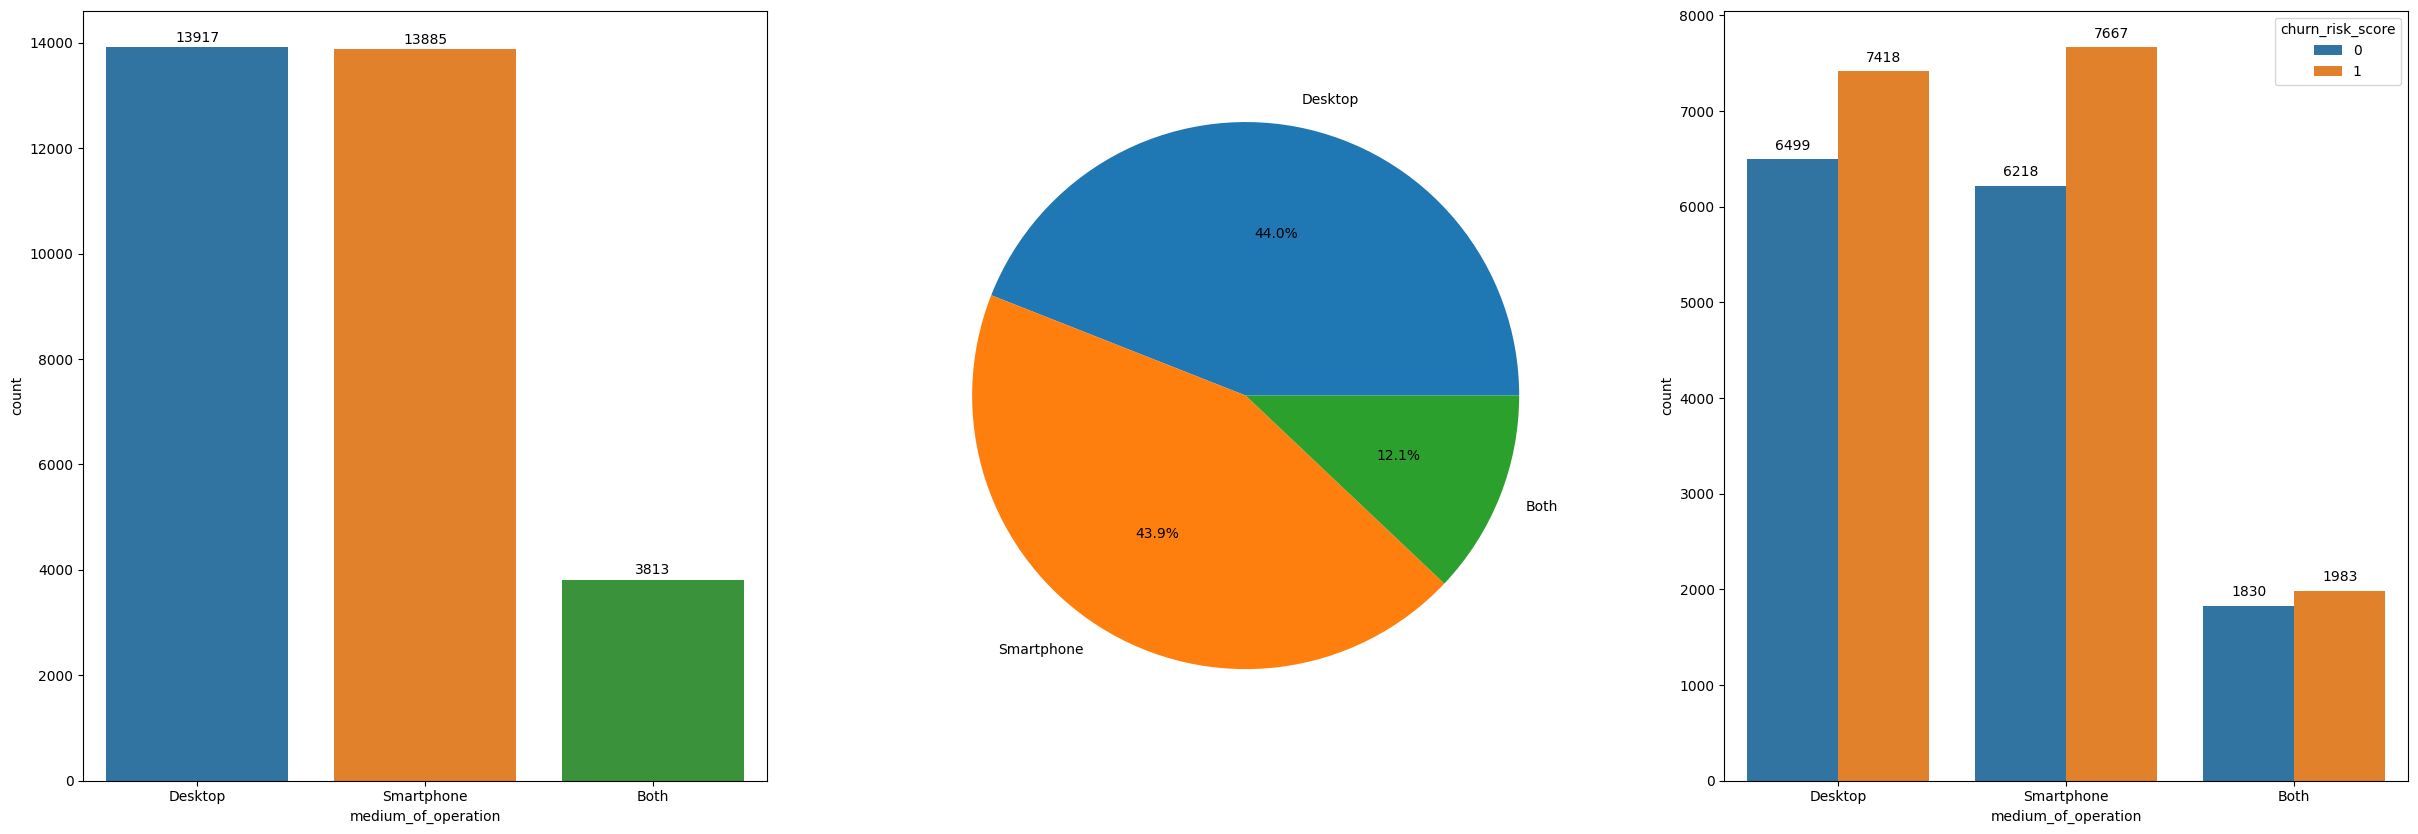

In [15]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
ax = sns.countplot(x='medium_of_operation', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,3,2)
plt.pie(data.medium_of_operation.value_counts(), labels= data.medium_of_operation.value_counts().index, autopct = '%1.1f%%')

plt.subplot(1,3,3)
ax = sns.countplot(x='medium_of_operation', hue='churn_risk_score',data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

kebanyakan para pelanggan hanya menggunakan 1 device antara desktop atau smartphone, sangat jarang pelanggan menggunakan keduanya sekaligus

## internet_option

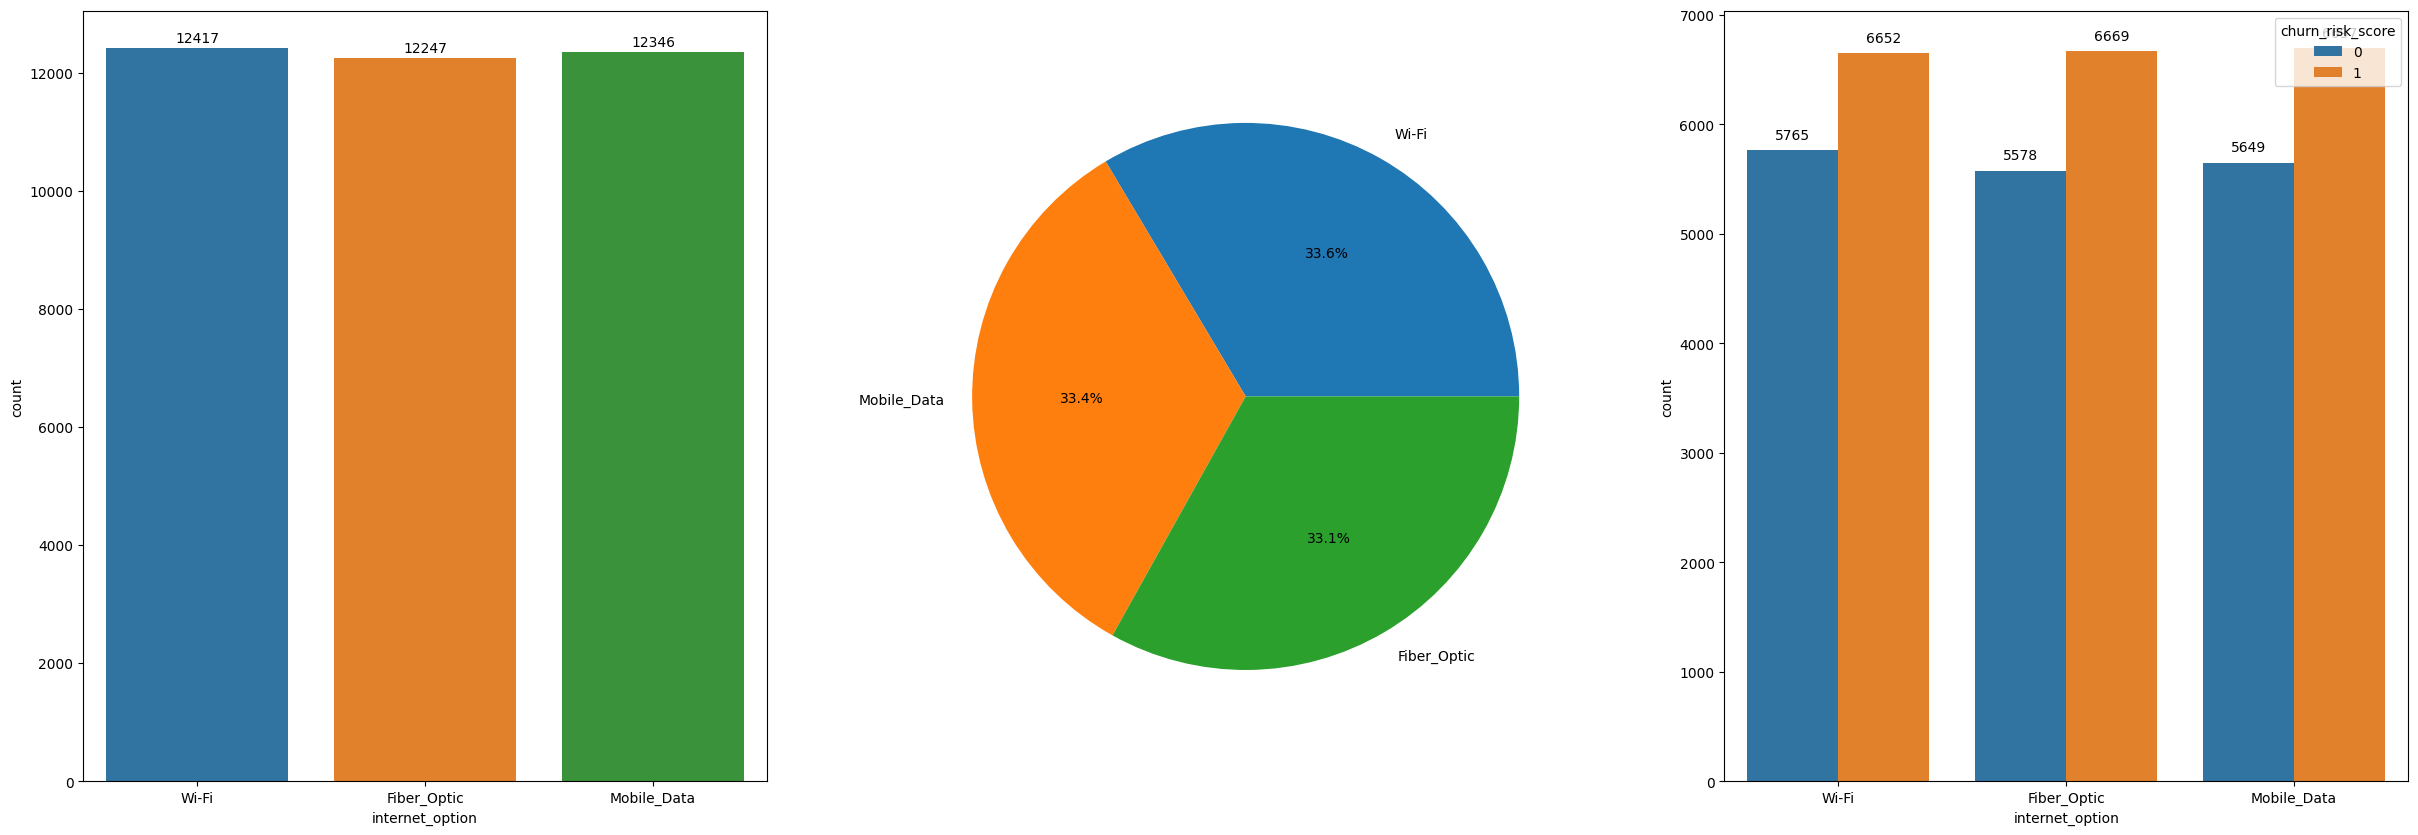

In [16]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
ax = sns.countplot(x='internet_option', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,3,2)
plt.pie(data.internet_option.value_counts(), labels= data.internet_option.value_counts().index, autopct = '%1.1f%%')

plt.subplot(1,3,3)
ax = sns.countplot(x='internet_option', hue='churn_risk_score',data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

dari grafik diatas dapat dilihat terdapat 3 jenis tipe layanan yaitu Wi-Fi, Fiber Optic dan Mobile Data dimana dari semua layanan itu jumlah pelanggan kurang lebih sama.

## used_special_discount

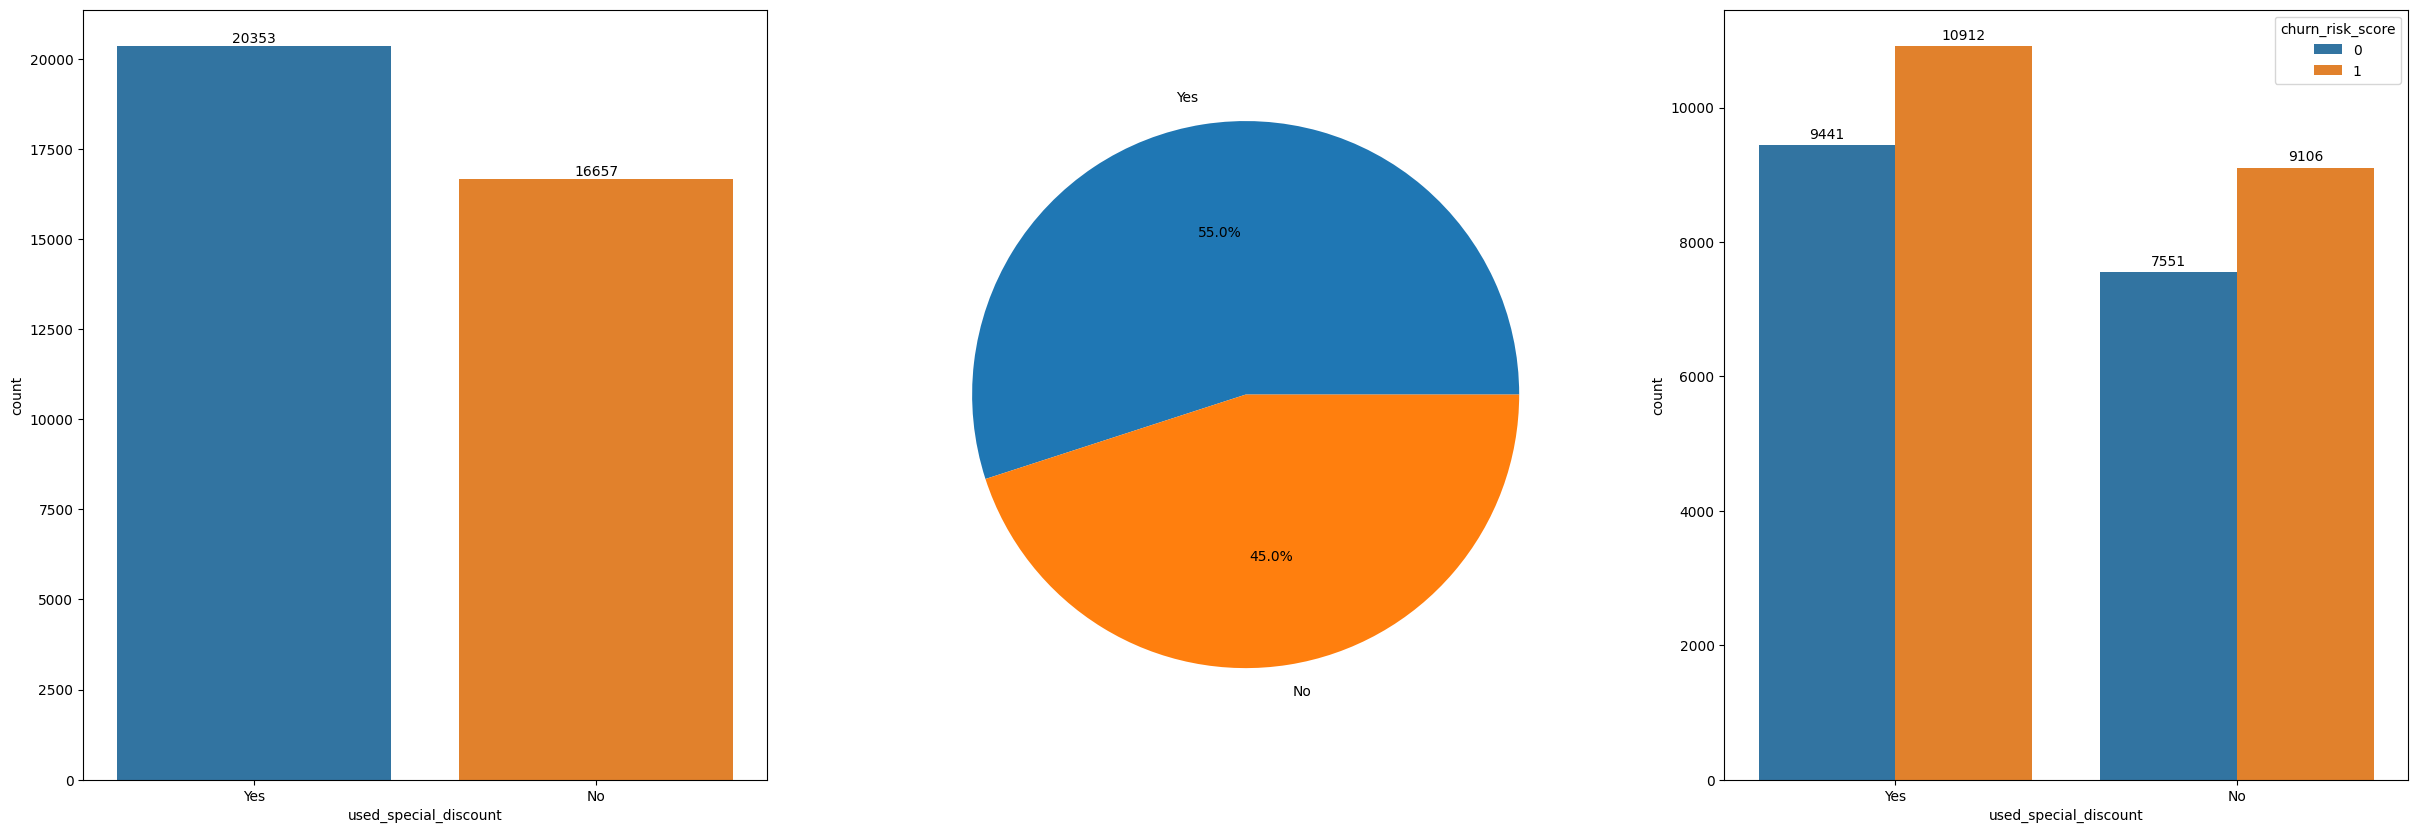

In [17]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
ax = sns.countplot(x='used_special_discount', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,3,2)
plt.pie(data.used_special_discount.value_counts(), labels= data.used_special_discount.value_counts().index, autopct = '%1.1f%%')

plt.subplot(1,3,3)
ax = sns.countplot(x='used_special_discount', hue='churn_risk_score',data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

kebanyakan pelanggan mendapatkan discount berlangganan, namun pelanggan yang mendapatkan diskon ini kebanyakan churn

## offer_application_preference

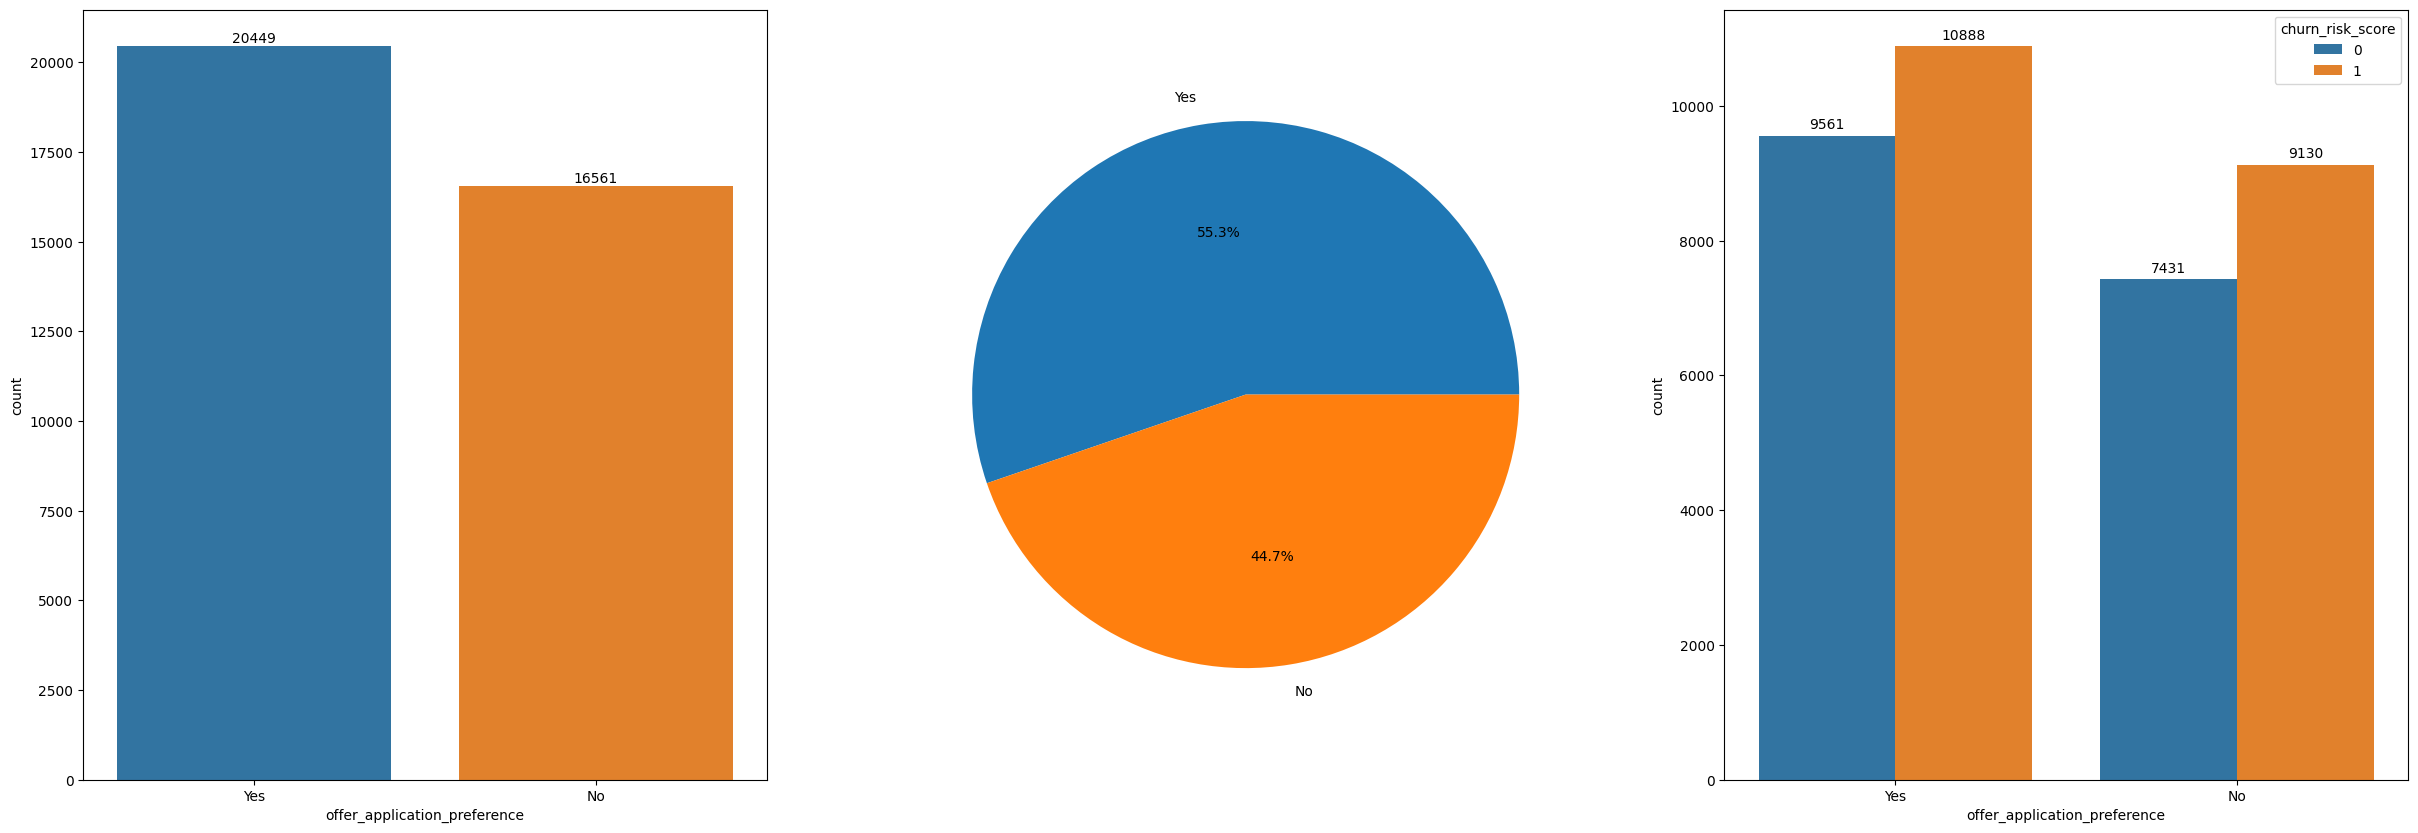

In [18]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
ax = sns.countplot(x='offer_application_preference', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,3,2)
plt.pie(data.offer_application_preference.value_counts(), labels= data.offer_application_preference.value_counts().index, autopct = '%1.1f%%')

plt.subplot(1,3,3)
ax = sns.countplot(x='offer_application_preference', hue='churn_risk_score',data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

ada sebesaar 55% pelanggan menyukain penawaran, pada countplot antara hubungan kolom offer application prefers dengan kolom target tidak memiliki korelasi

## past_complaint

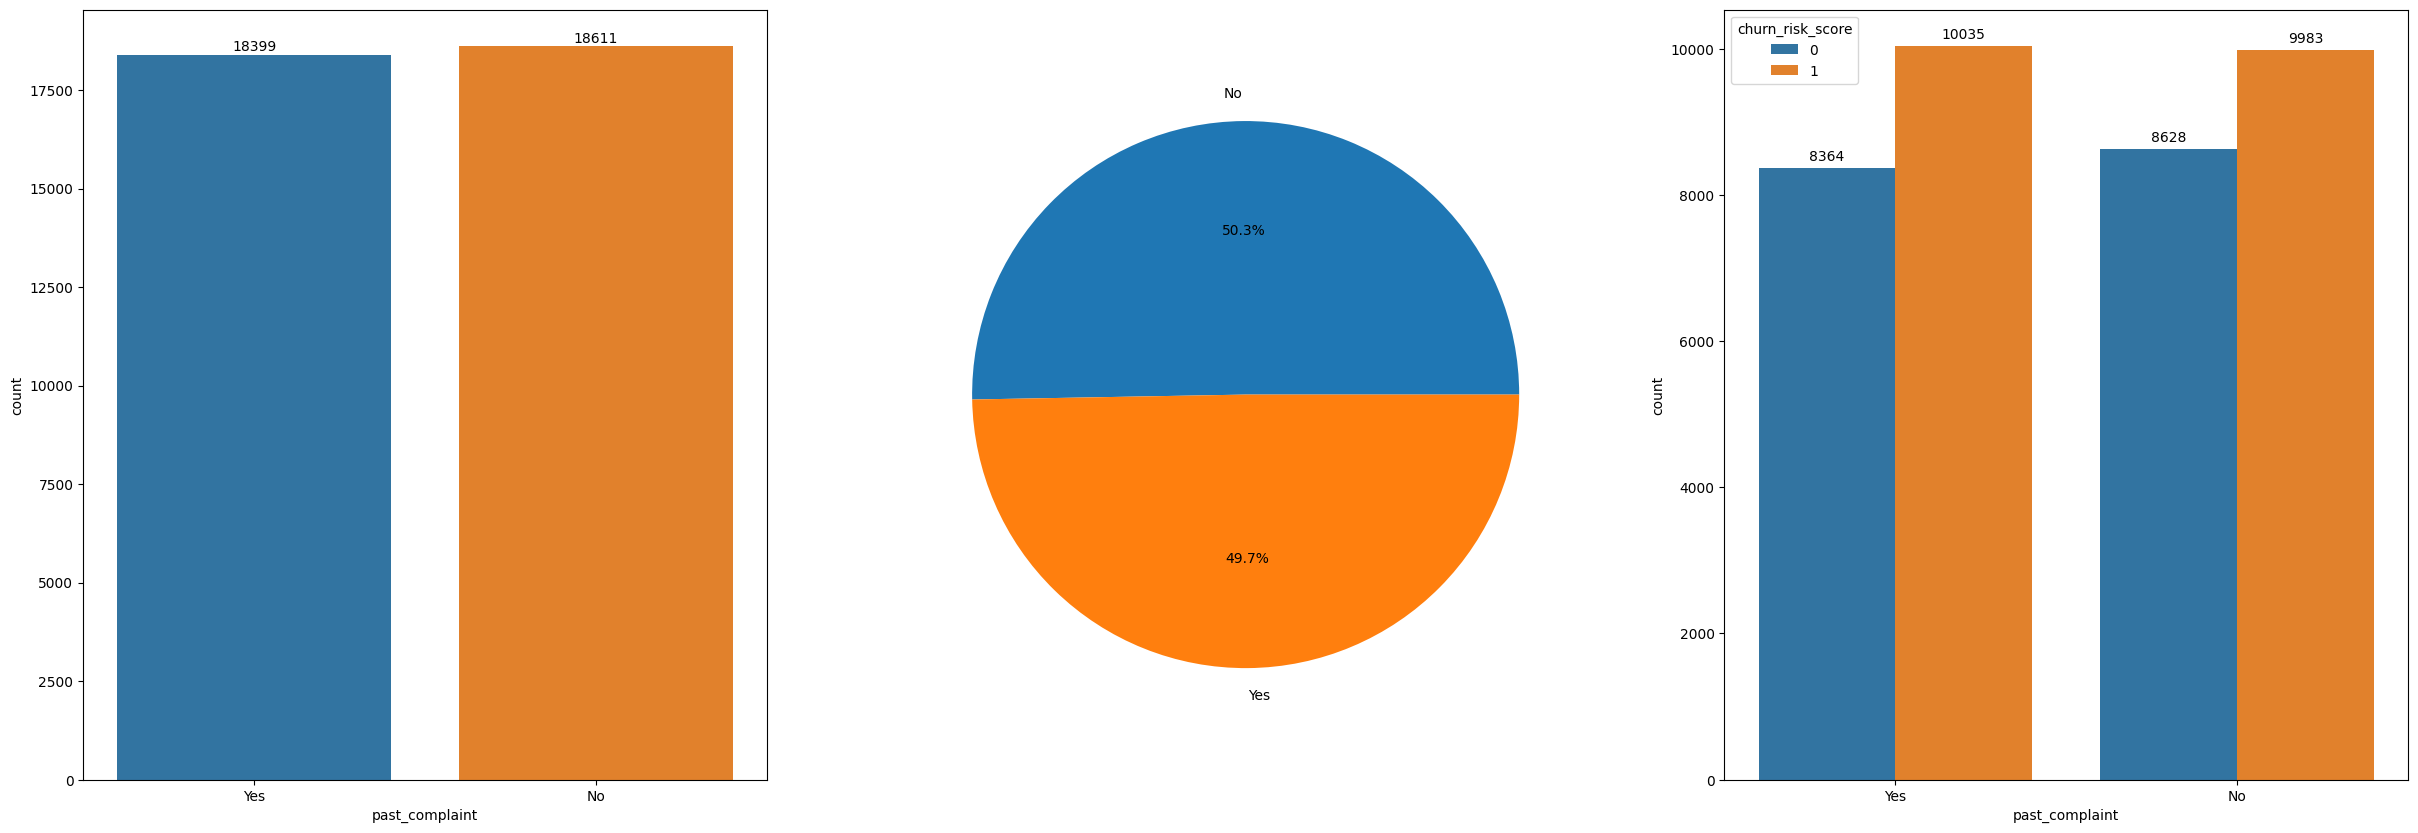

In [19]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
ax = sns.countplot(x='past_complaint', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,3,2)
plt.pie(data.past_complaint.value_counts(), labels= data.past_complaint.value_counts().index, autopct = '%1.1f%%')

plt.subplot(1,3,3)
ax = sns.countplot(x='past_complaint', hue='churn_risk_score',data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

pada kolom past complaint, pelanggan yang mengajukan keluhan dan yang tidak memiliki jumlah yang sama dan tidak ada hubungan antara kolom past complaint dengan kolom target

## complaint_status

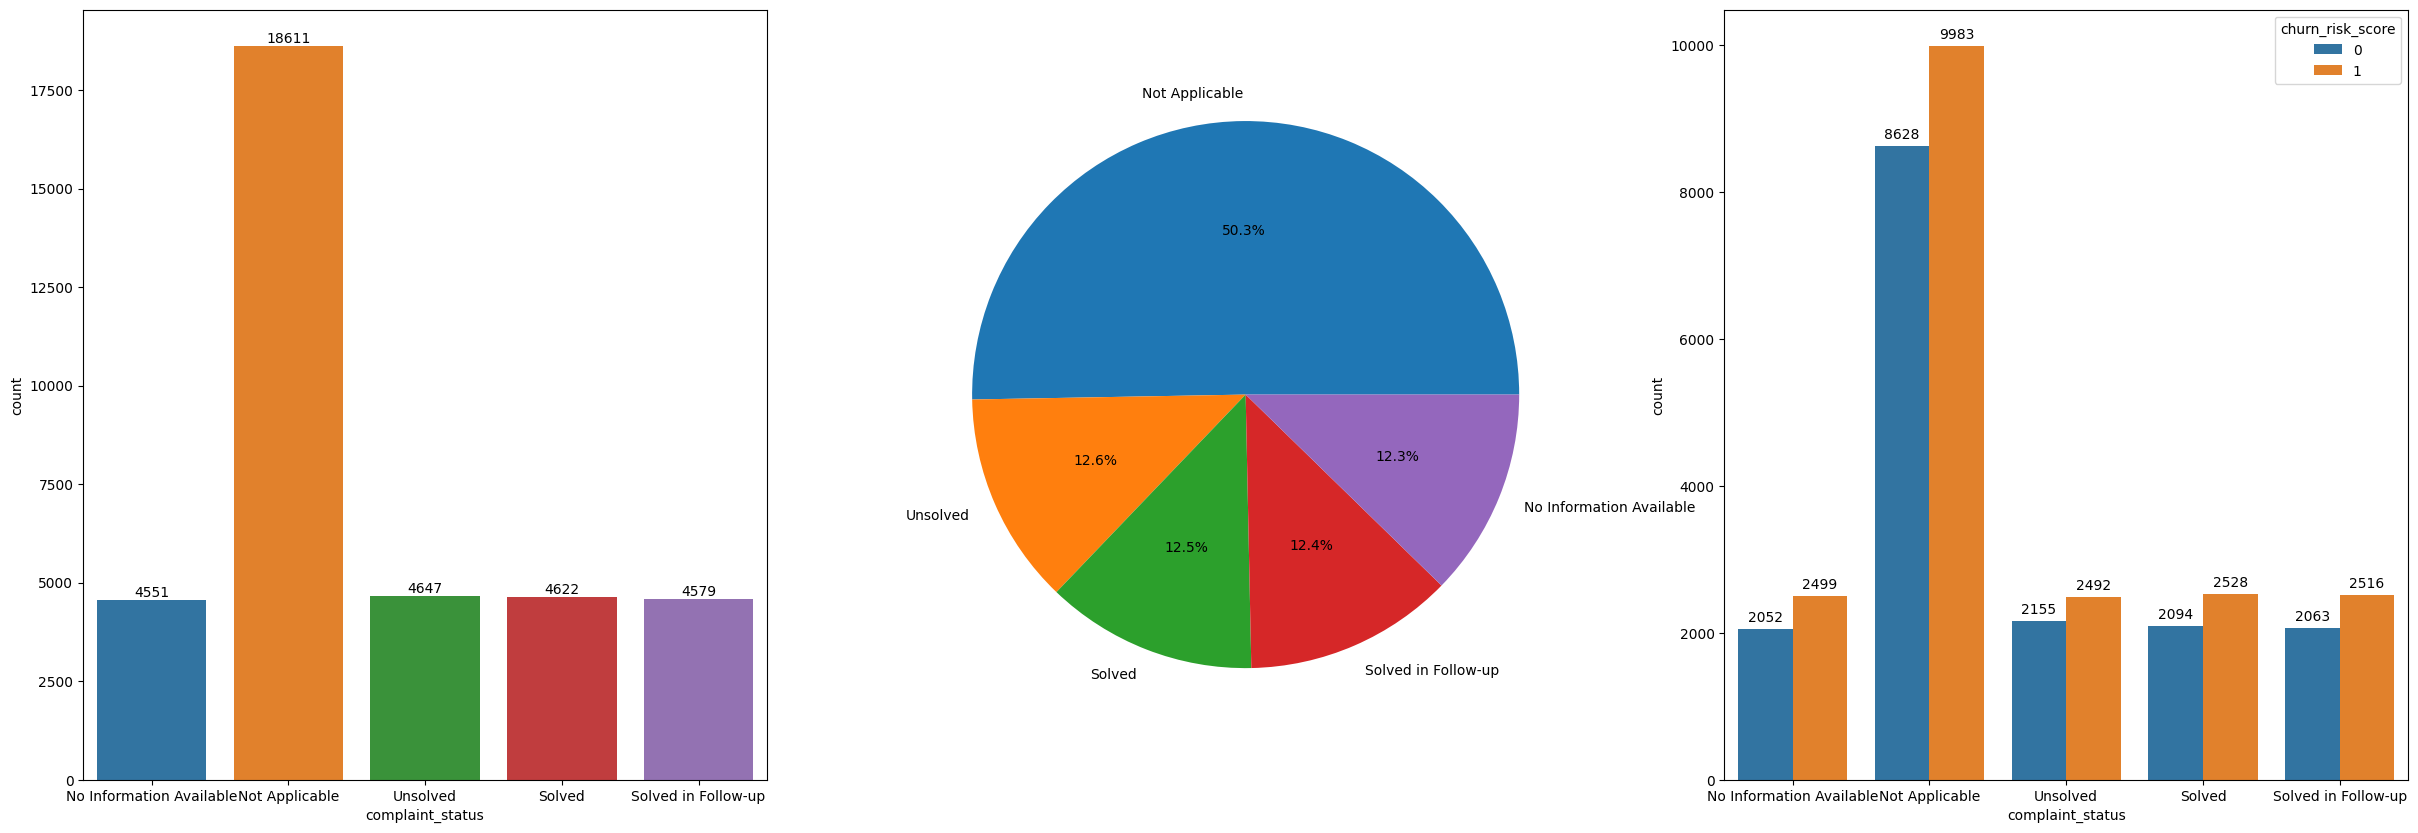

In [20]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
ax = sns.countplot(x='complaint_status', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,3,2)
plt.pie(data.complaint_status.value_counts(), labels= data.complaint_status.value_counts().index, autopct = '%1.1f%%')

plt.subplot(1,3,3)
ax = sns.countplot(x='complaint_status', hue='churn_risk_score',data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

pada kolom complaint status kebanyakan status complaint adalah not applicable sebanyak 50% complaint, pada countplot hubungan antara kolom complaiant status dan target tidak terlihat adanya hubungan antar kolom ini

## feedback

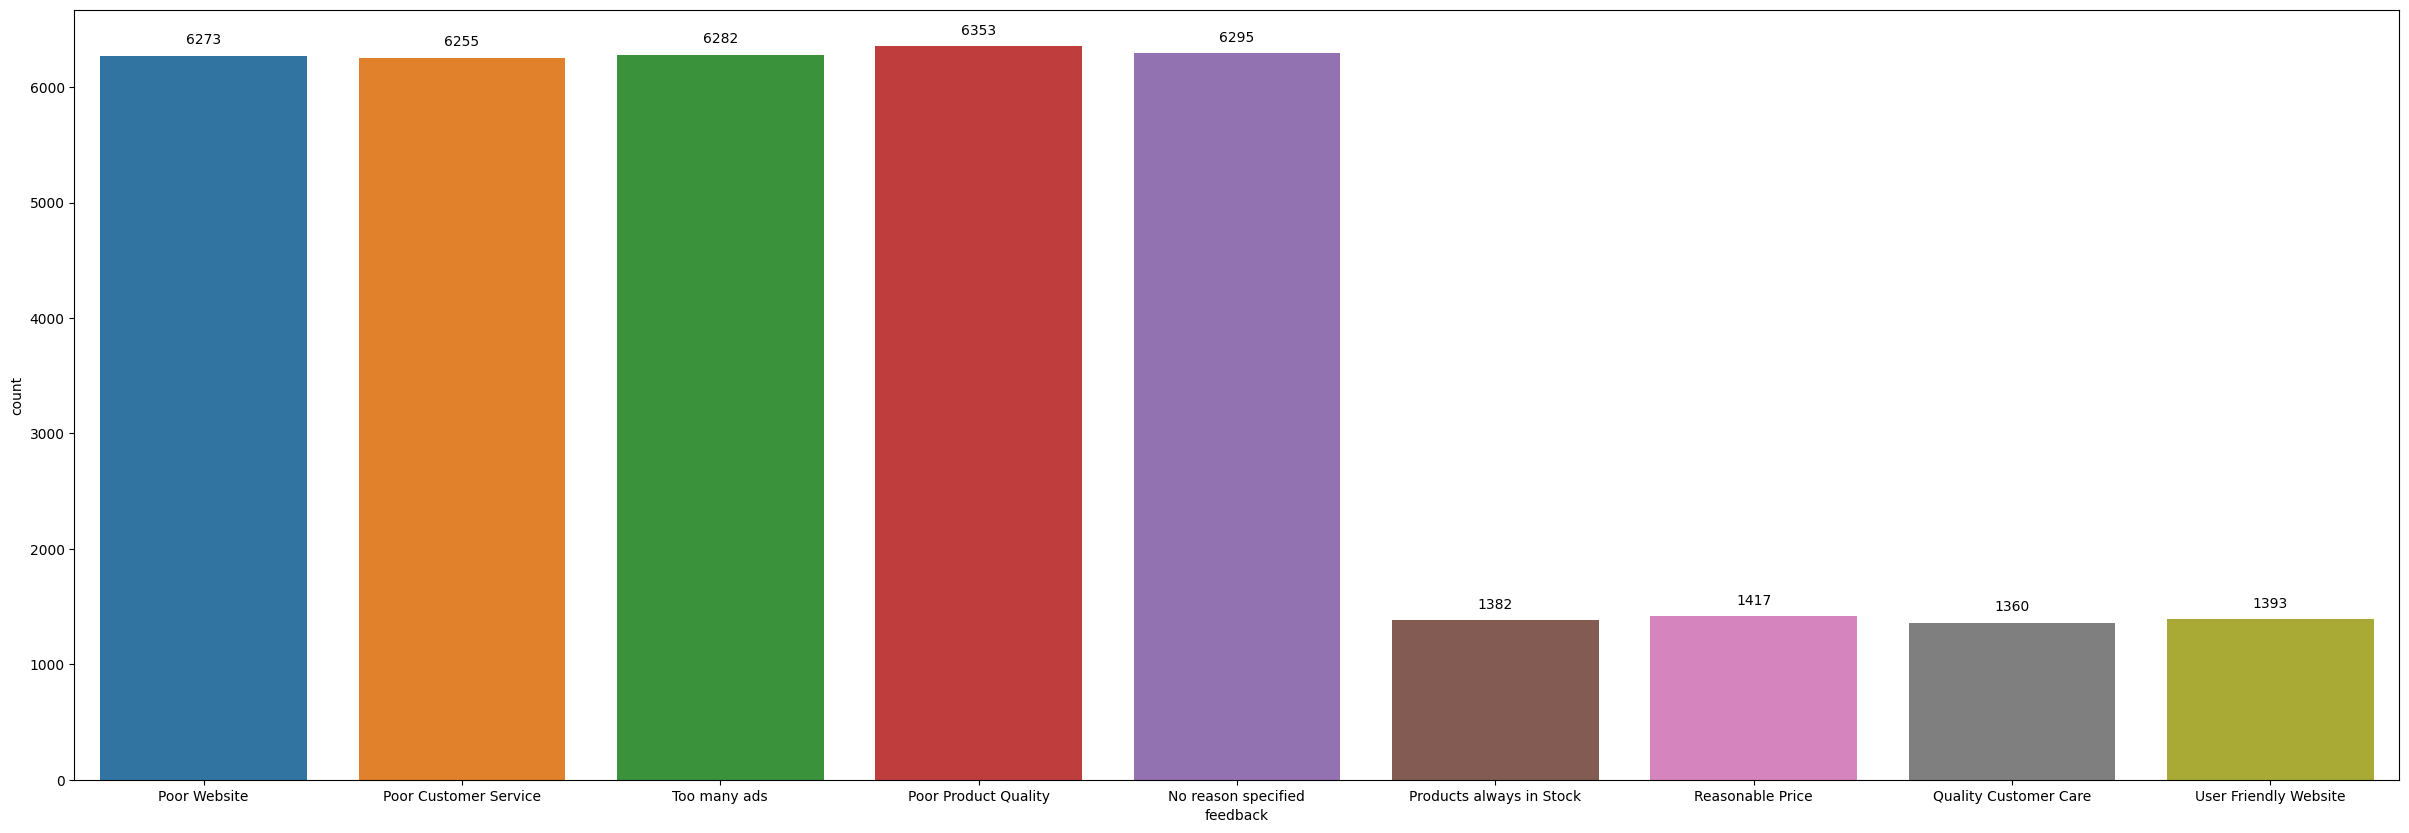

In [21]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='feedback', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

kebanyakan perusahaan ini memiliki feedback yang negatif dibandingkan dengan yang positif

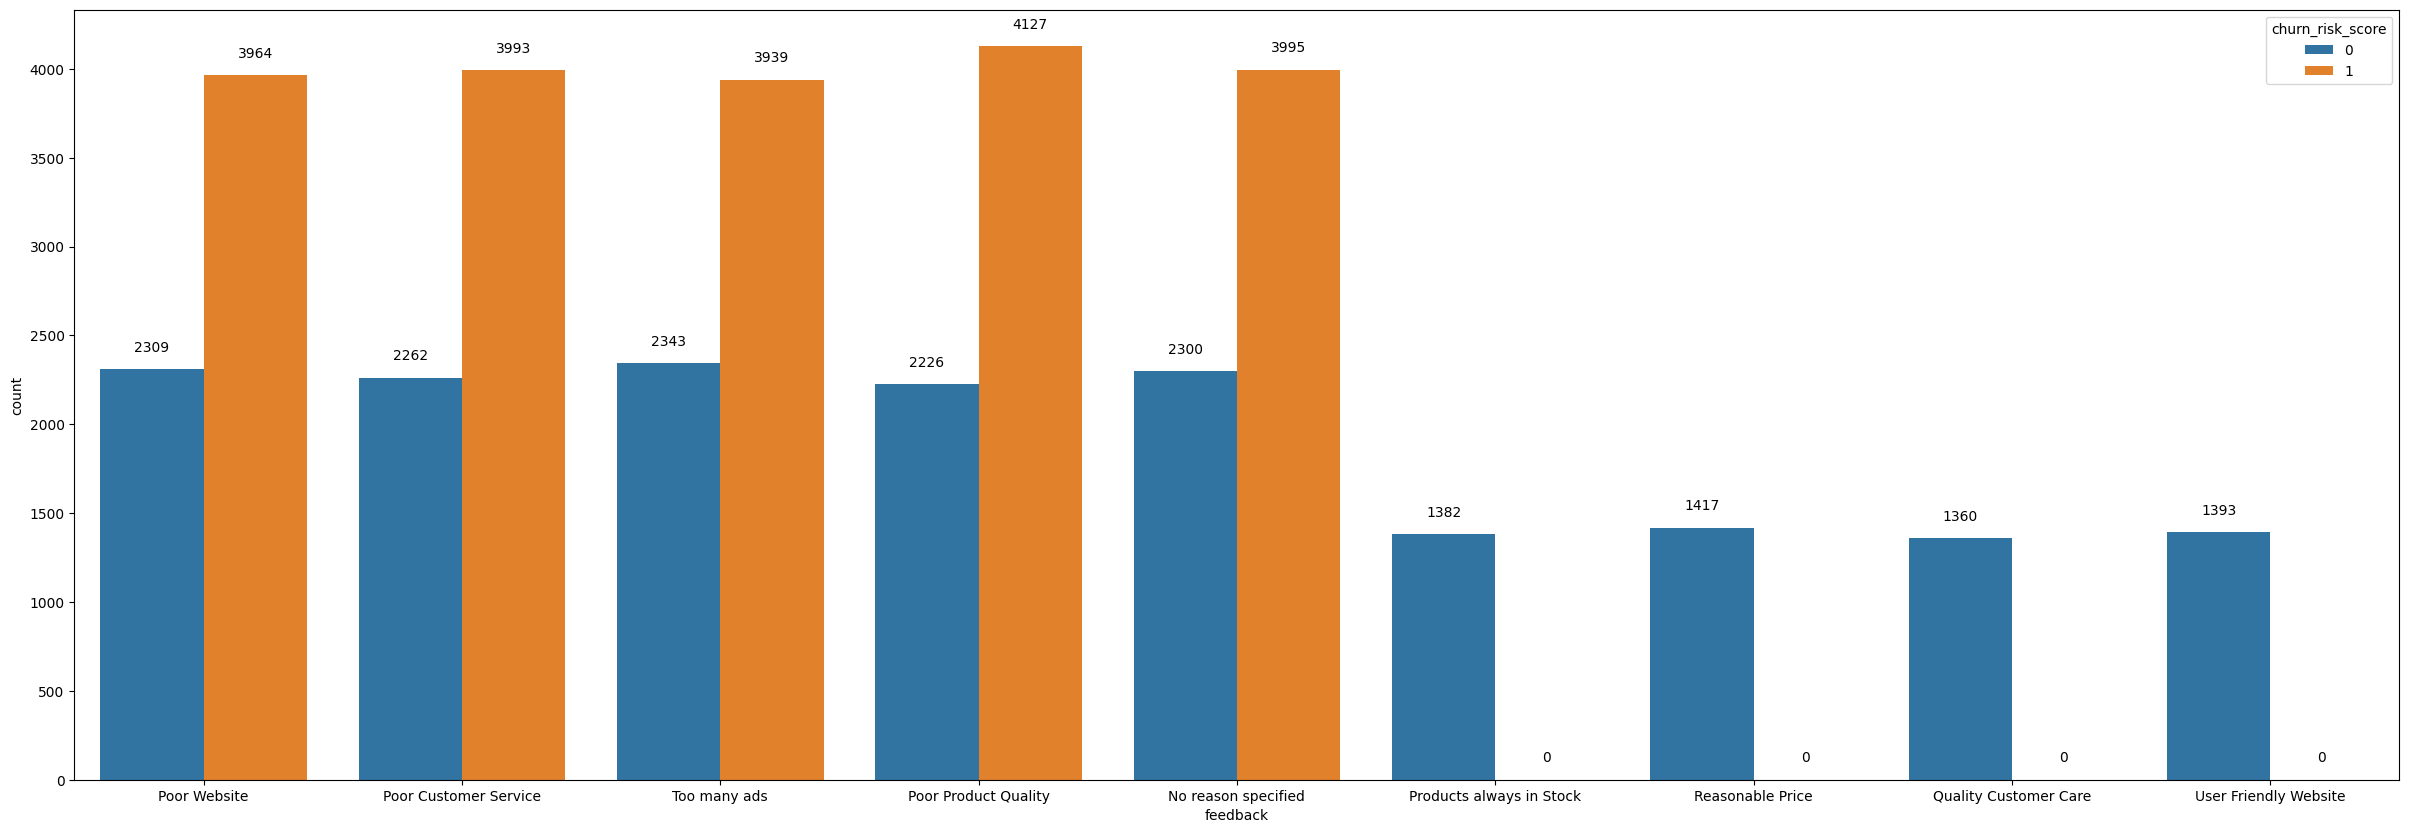

In [22]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='feedback', hue='churn_risk_score',data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 100, '{:1.0f}'.format(height), ha="center")

kebanyakan pelanggan yang meninggalkan perushaan adalah pelanggan yang memiliki feedback negatif yaitu `Poor Website`, `Poor Customer Service`, `Too many ads`, `Poor Product Quality`, `No reason specified feedback`, sedangkan pelanggan yang memberikan feedback positif seperti `Product always in stock`, `Reasonable Price`, `Quality Customer Care`, `User Firendly Website` tidak ada yang meninggalkan perusahaan atau tetap menjadi pelanggan. 

## avg_transaction_value

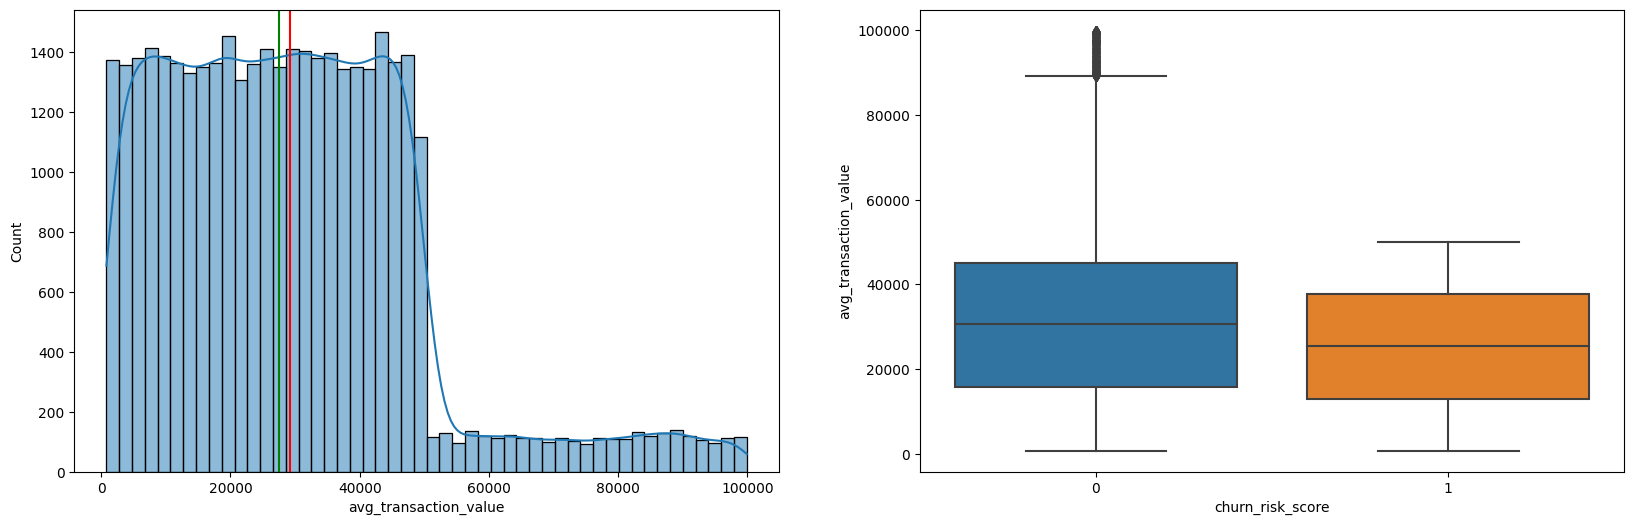

Skewness : 1.0107511716123325
Mean : 29272.43021642799
Median : 27554.485


In [23]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(x='avg_transaction_value', bins=50, kde = True, data = data)
plt.axvline(data.avg_transaction_value.mean(), color='r', label = 'Mean')
plt.axvline(data.avg_transaction_value.median(), color='g', label = 'Median')

plt.subplot(1,2,2)
sns.boxplot(x='churn_risk_score', y='avg_transaction_value', data = data)
plt.show()

print('Skewness :', data.avg_transaction_value.skew())
print('Mean :', data.avg_transaction_value.mean())
print('Median :', data.avg_transaction_value.median())

rata rata avg_transaction_value 29272 dan memiliki distribusi yang skewed, dan terlihat pada boxplot bahwa semakin tinggi rata rata transaksi pada pelanggan maka pelanggan akan tetap berlangganan

## avg_frequency_login_days

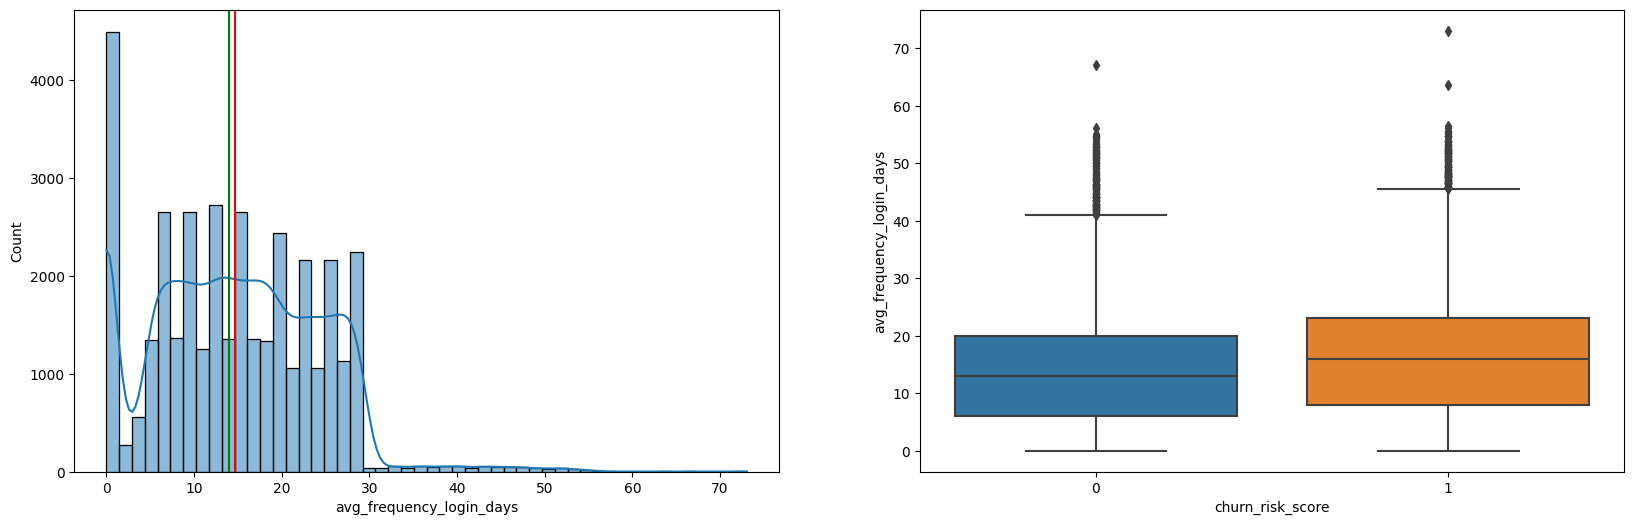

Skewness : 0.389538185530503
Mean : 14.659539531414557
Median : 14.0


In [24]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(x='avg_frequency_login_days', bins=50, kde = True, data = data)
plt.axvline(data.avg_frequency_login_days.mean(), color='r', label = 'Mean')
plt.axvline(data.avg_frequency_login_days.median(), color='g', label = 'Median')

plt.subplot(1,2,2)
sns.boxplot(x='churn_risk_score', y='avg_frequency_login_days', data = data)
plt.show()

print('Skewness :', data.avg_frequency_login_days.skew())
print('Mean :', data.avg_frequency_login_days.mean())
print('Median :', data.avg_frequency_login_days.median())

rata rata pealnggan login pada website perusahaan adalah 15 hari, terdapat korelasi pada kolom ini dengan target, terlihat pada boxplot kebanyakan pelanggan yang churn adalah yang sering membuka website, mungkin dikarenakan performa website yang kurang baik atau terlalu banyak iklan yang mengganggu pelanggan

## points_in_wallet

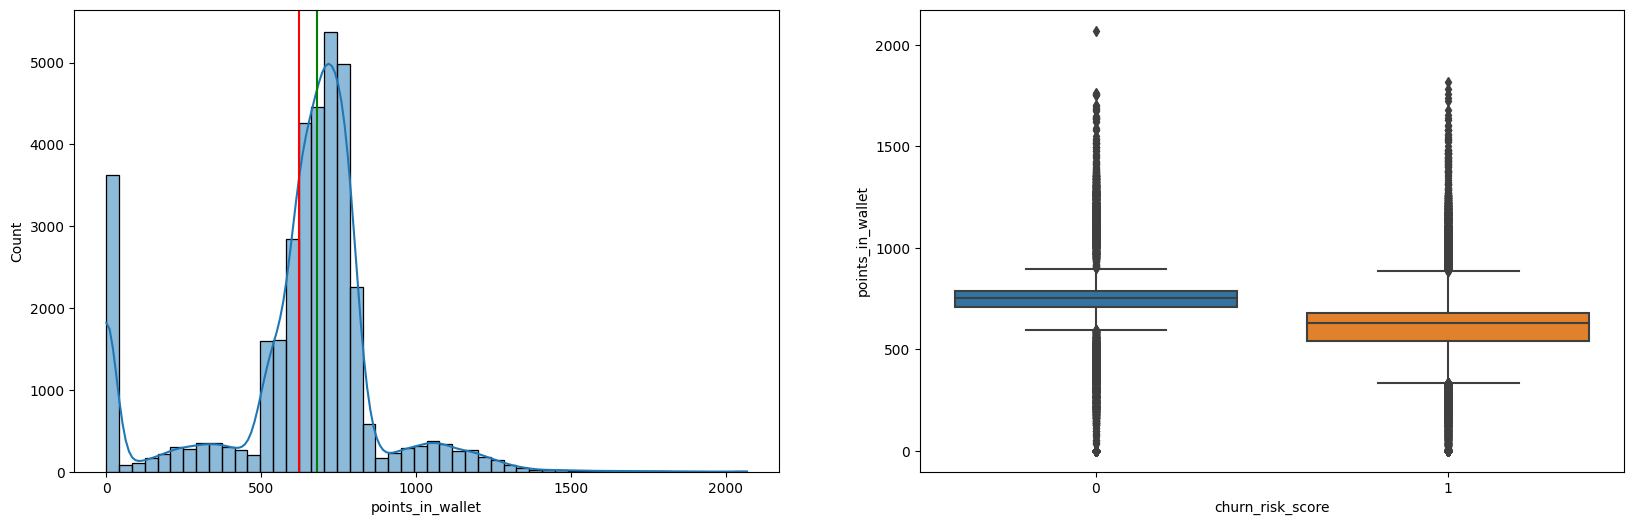

Skewness : -0.7738913518208214
Mean : 623.5908849241113
Median : 680.4


In [25]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(x='points_in_wallet', bins=50, kde = True, data = data)
plt.axvline(data.points_in_wallet.mean(), color='r', label = 'Mean')
plt.axvline(data.points_in_wallet.median(), color='g', label = 'Median')

plt.subplot(1,2,2)
sns.boxplot(x='churn_risk_score', y='points_in_wallet', data = data)
plt.show()

print('Skewness :', data.points_in_wallet.skew())
print('Mean :', data.points_in_wallet.mean())
print('Median :', data.points_in_wallet.median())

rata rata point yang dimiliki oleh pelanggan sebanyak 624 dan kebanyakan pelanggan memiliki 800 point, pada boxplot terlihat kolom point in wallet memiliki korelasi dengan kolot targer, telihat pelanggan yang memiliki point yang tinggi sekitar 750 masih tetap menjadi pelanggan (not churn)

## Matrix Correlation

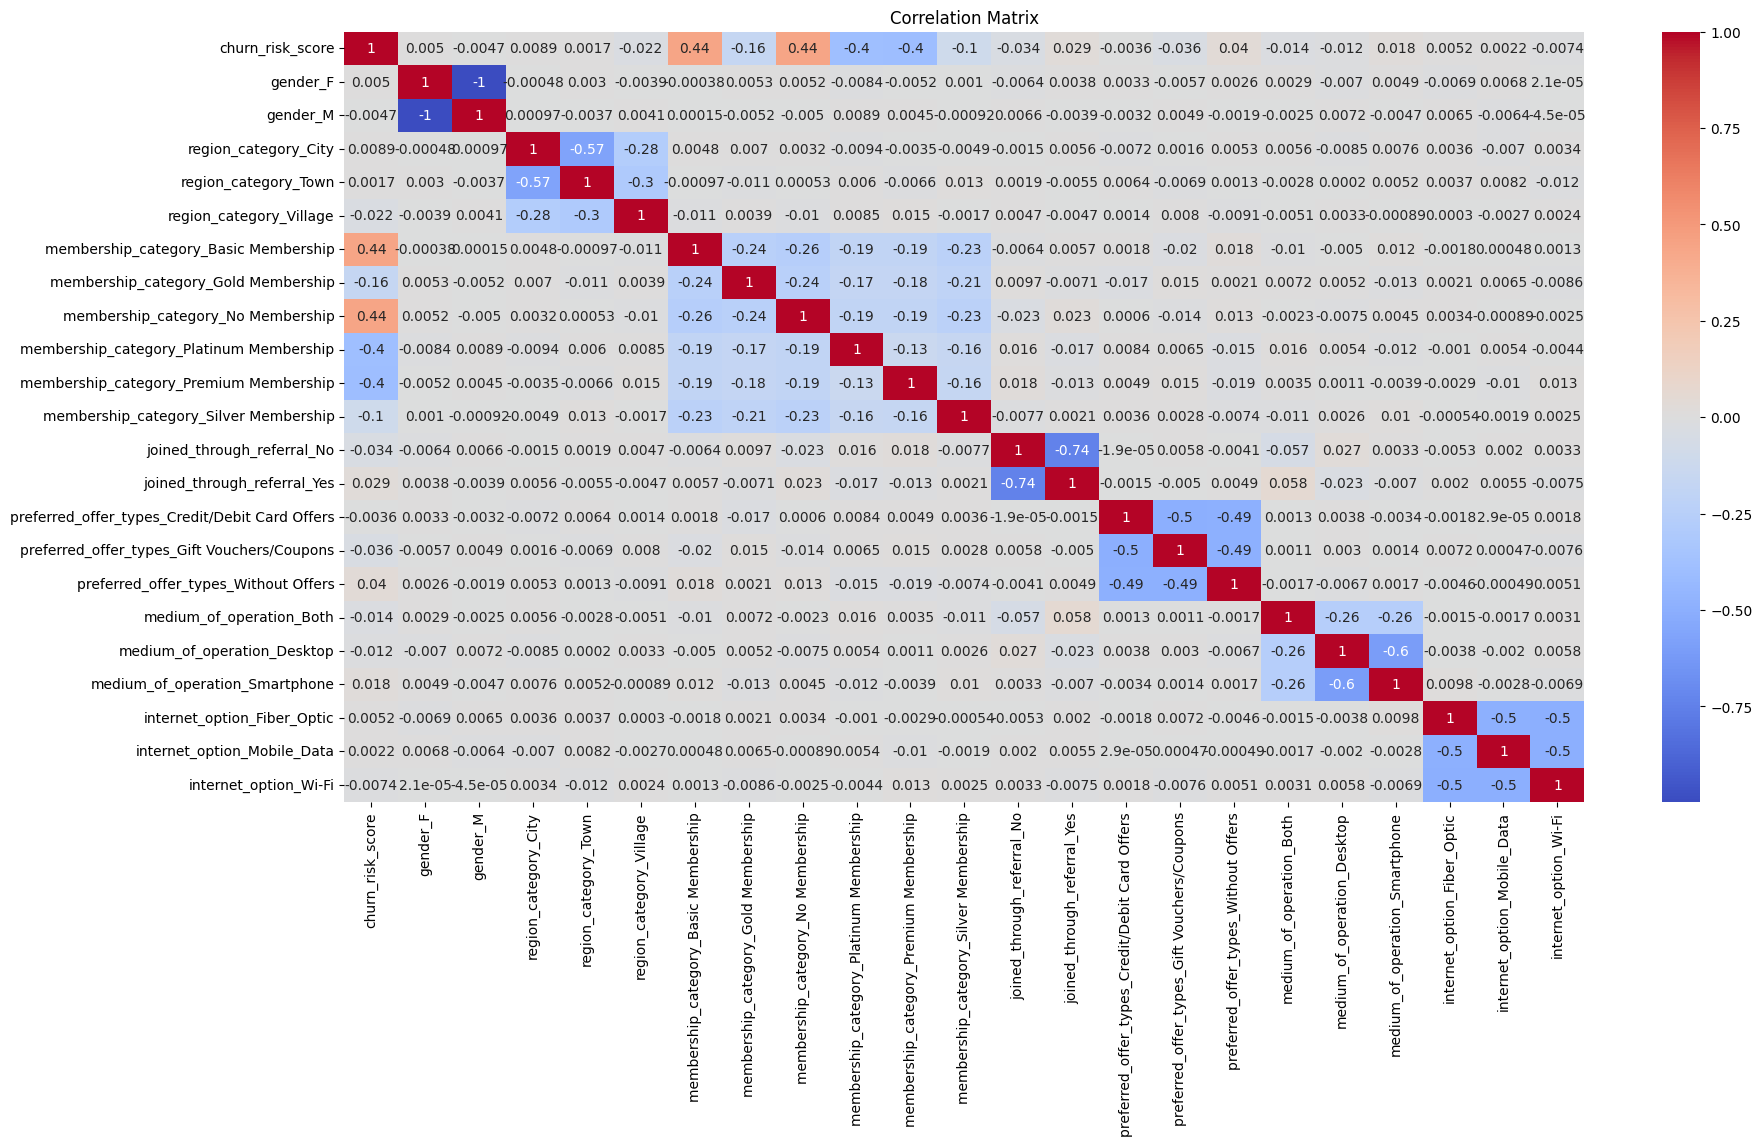

In [26]:
corr = pd.concat([data[['churn_risk_score']], \
                 pd.get_dummies(data[['gender','region_category','membership_category','joined_through_referral','preferred_offer_types','medium_of_operation','internet_option']])], axis=1).corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

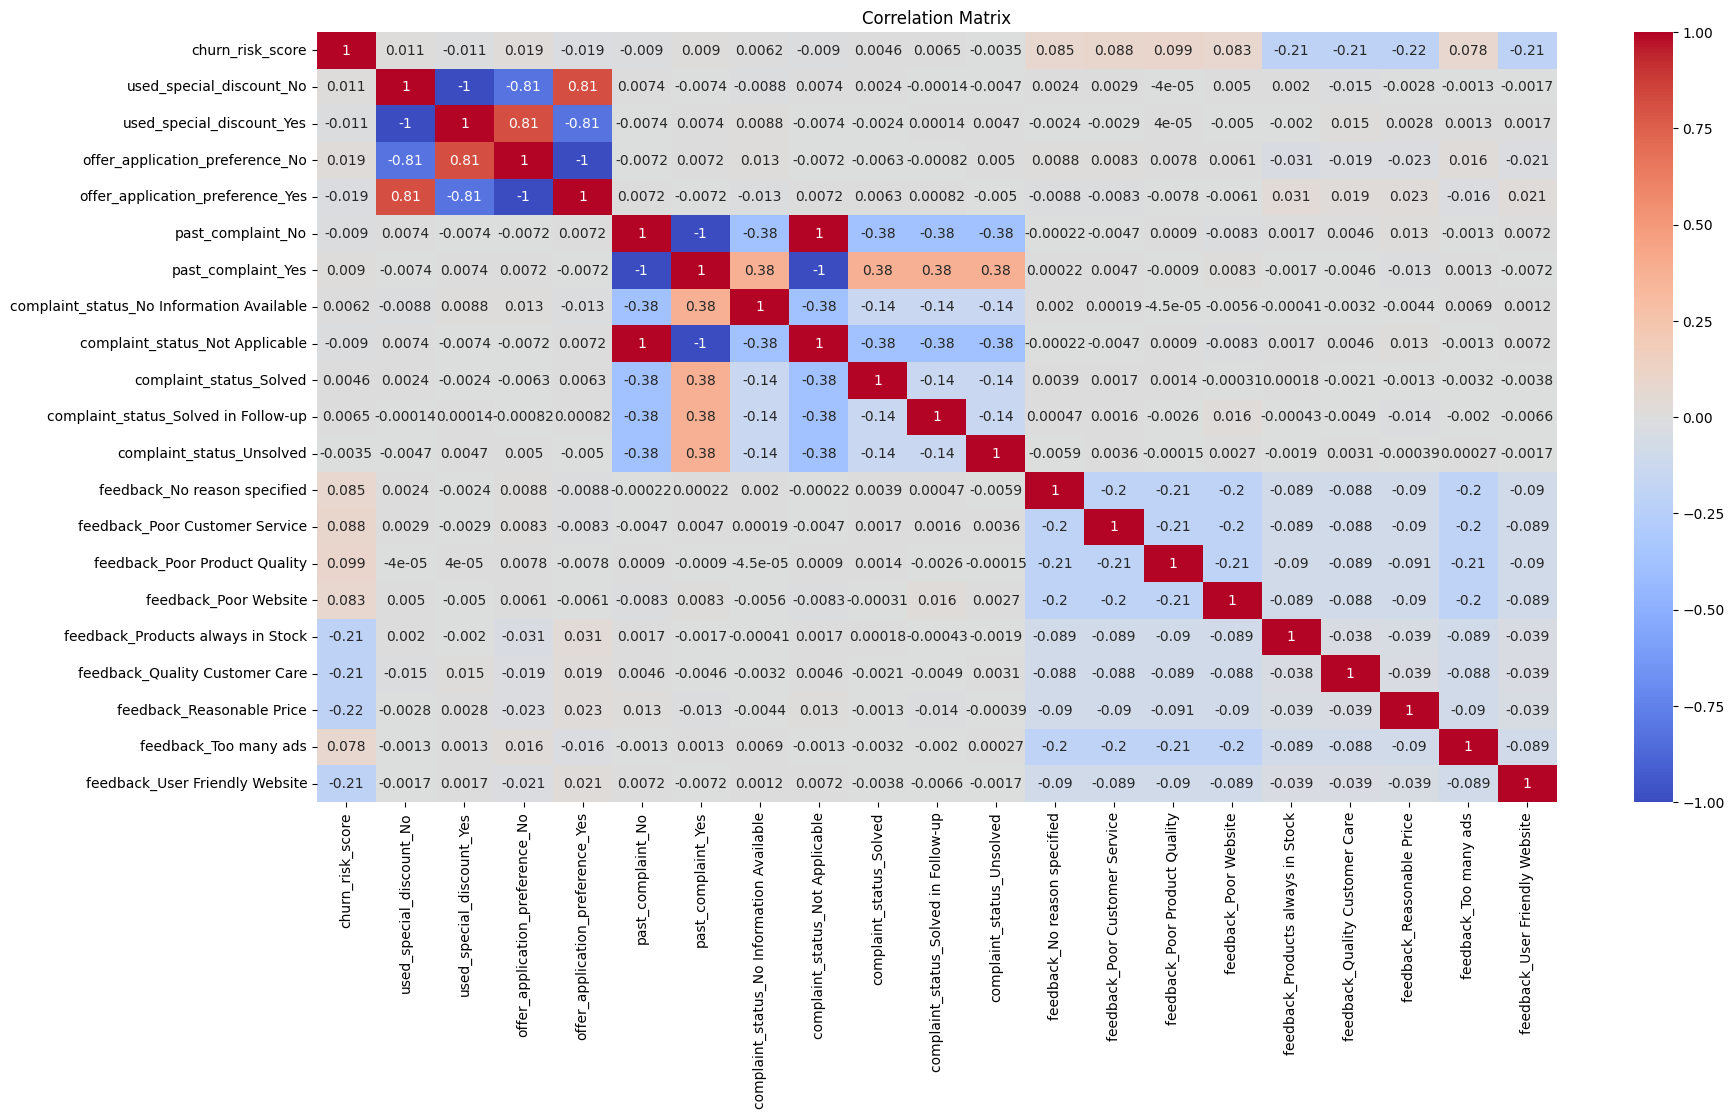

In [27]:
corr = pd.concat([data[['churn_risk_score']], \
                 pd.get_dummies(data[['used_special_discount','offer_application_preference','past_complaint','complaint_status','feedback']])], axis=1).corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\salma\AppData\Local\Temp\ipykernel_25808\4186553820.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


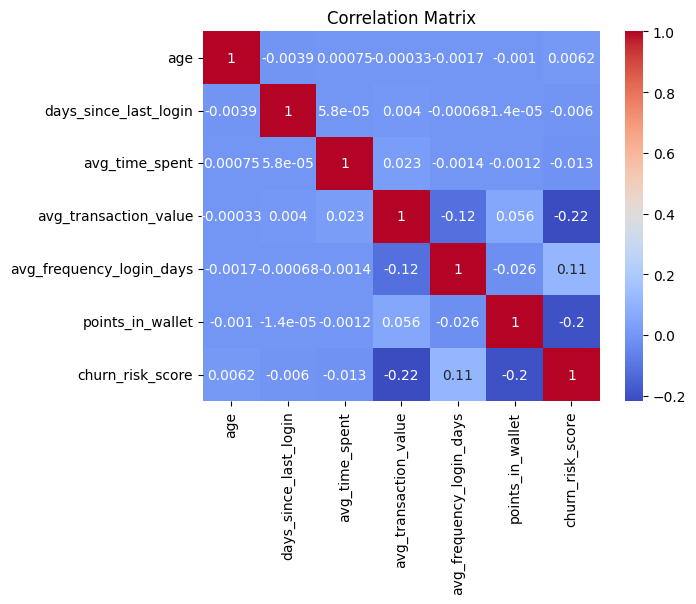

In [28]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


pada correlation matrix terlihat kolom target memiliki hubungan denga kolom membership_category,complaint_status,feedback,avg_transaction_value,avg_frequency_login_days,points_in_wallet, kolom kolom ini akan dijadikan sebagai feature

# Data Preprocessing

Pada bagian ini dilakukan splitting data dengan perbandingan 7:2:1 dimana 70% untuk train-set, 20% untuk validation-set dan 10% untuk test-set

In [29]:
# Split data
df_train_val, df_test = train_test_split(data, test_size=0.1, random_state=27, stratify=data.churn_risk_score)
df_train, df_val = train_test_split(df_train_val, test_size=0.2, random_state=27, stratify=df_train_val.churn_risk_score)

print('Train Size : ', df_train.shape)
print('Val Size : ', df_test.shape)
print('Test Size : ', df_val.shape)

Train Size :  (26647, 21)
Val Size :  (3701, 21)
Test Size :  (6662, 21)


In [30]:
print(f'X_train proportion: {len(df_train) / len(data):.1f}')
print(f'X_test proportion: {len(df_test) / len(data):.1f}')
print(f'X_val proportion: {len(df_val) / len(data):.1f}')

X_train proportion: 0.7
X_test proportion: 0.1
X_val proportion: 0.2


## Handling Missing Values

pada bagian ini dilakukan penghapusan missing value

In [31]:
# Check Missing Values on X_train
df_train.isnull().sum()

age                                0
gender                            39
region_category                 3887
membership_category                0
joining_date                       0
joined_through_referral         3980
preferred_offer_types            207
medium_of_operation             3865
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [32]:
df_train = df_train.dropna()

In [33]:
# Check Missing Values on X_val

df_val.isnull().sum()

age                               0
gender                           11
region_category                 996
membership_category               0
joining_date                      0
joined_through_referral         969
preferred_offer_types            56
medium_of_operation             998
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
churn_risk_score                  0
dtype: int64

In [34]:
df_val = df_val.dropna()

In [35]:
# Check Missing Values on X_test

df_test.isnull().sum()

age                               0
gender                            9
region_category                 548
membership_category               0
joining_date                      0
joined_through_referral         493
preferred_offer_types            25
medium_of_operation             532
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
churn_risk_score                  0
dtype: int64

In [36]:
df_test = df_test.dropna()

In [37]:
# Merubah tipe data
df_train['membership_category'] = df_train.membership_category.map({'No Membership': 1, 'Basic Membership': 2, 'Silver Membership' : 3, 'Gold Membership' : 4,   'Premium Membership' : 5, 'Platinum Membership' : 6})
df_val['membership_category'] = df_val.membership_category.map({'No Membership': 1, 'Basic Membership': 2, 'Silver Membership' : 3, 'Gold Membership' : 4,   'Premium Membership' : 5, 'Platinum Membership' : 6})
df_test['membership_category'] = df_test.membership_category.map({'No Membership': 1, 'Basic Membership': 2, 'Silver Membership' : 3, 'Gold Membership' : 4,   'Premium Membership' : 5, 'Platinum Membership' : 6})

## Feature Engineering

### Feature Selection

In [38]:
X_train = df_train[['membership_category','complaint_status','feedback','avg_transaction_value','avg_frequency_login_days','points_in_wallet']] # Features
X_val = df_val[['membership_category','complaint_status','feedback','avg_transaction_value','avg_frequency_login_days','points_in_wallet']] # Features
X_test = df_test[['membership_category','complaint_status','feedback','avg_transaction_value','avg_frequency_login_days','points_in_wallet']] # Features
y_train =df_train[['churn_risk_score']] #Target
y_val =df_val[['churn_risk_score']]  #Target
y_test =df_test[['churn_risk_score']]  #Target
X_train


,membership_category,complaint_status,feedback,avg_transaction_value,avg_frequency_login_days,points_in_wallet
13873,2,Not Applicable,Poor Product Quality,41881.61,25.0,587.57
3317,4,Unsolved,Too many ads,2146.96,24.0,651.84
14130,3,Not Applicable,Poor Website,44673.13,11.0,0.00
1428,1,Solved in Follow-up,Too many ads,1759.39,22.0,645.02
10579,4,Solved,Too many ads,19777.25,8.0,624.53
...,...,...,...,...,...,...
28268,2,Not Applicable,No reason specified,25273.46,28.0,639.92
20968,3,Not Applicable,Poor Product Quality,17493.80,0.0,618.48
13266,4,Solved,Too many ads,1682.53,7.0,717.40
32810,2,Solved,Too many ads,6343.70,0.0,574.22


In [39]:
# Splitting numerical column dan categorical columns
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['membership_category', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
Categorical Columns :  ['complaint_status', 'feedback']


### pipe line

pada bagian ini dilakukan pembuatan pipeline dimana untuk numerical columns akan di scale menggunakan standard scaler dan untuk categorical columns dilakukan encoding menggunakan OneHotEncoder dan setelahnya kedua data hasil scale dan encode digabungkan dengan ColumnTransformer

In [40]:
num_pipeline = make_pipeline(StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [41]:
X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)
X_train.shape

(16474, 18)

In [42]:
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')

X_train shape: (16474, 18)
X_val shape: (4076, 18)


### Input Pipeline

In [43]:
df_train = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train)).batch(27)
df_val = tf.data.Dataset.from_tensor_slices((X_val, y_val)).shuffle(len(X_val)).batch(27)

# Sequential API

## Model Definition

In [44]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [45]:
# Model sequential
model_sequential = Sequential()
model_sequential.add(Dense(10, activation='relu', input_shape=(18,))) # Hidden Layer 1
model_sequential.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                190       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [46]:
# Train the Model
history_seq = model_sequential.fit(df_train,
                                   epochs=30,
                                   validation_data=df_val,
                                   batch_size=32)

Epoch 1/30
611/611 [==============================] - 1s 2ms/step - loss: 0.4783 - accuracy: 0.7599 - val_loss: 0.3227 - val_accuracy: 0.8486
Epoch 2/30
611/611 [==============================] - 1s 1ms/step - loss: 0.3031 - accuracy: 0.8453 - val_loss: 0.2949 - val_accuracy: 0.8484
Epoch 3/30
611/611 [==============================] - 1s 1ms/step - loss: 0.2924 - accuracy: 0.8458 - val_loss: 0.2915 - val_accuracy: 0.8496
Epoch 4/30
611/611 [==============================] - 1s 1ms/step - loss: 0.2888 - accuracy: 0.8451 - val_loss: 0.2881 - val_accuracy: 0.8491
Epoch 5/30
611/611 [==============================] - 1s 1ms/step - loss: 0.2857 - accuracy: 0.8464 - val_loss: 0.2860 - val_accuracy: 0.8496
Epoch 6/30
611/611 [==============================] - 1s 1ms/step - loss: 0.2830 - accuracy: 0.8464 - val_loss: 0.2823 - val_accuracy: 0.8496
Epoch 7/30
611/611 [==============================] - 1s 1ms/step - loss: 0.2792 - accuracy: 0.8465 - val_loss: 0.2788 - val_accuracy: 0.8499
Epoch 

## Model Evaluation

In [47]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.478337,0.759925,0.322697,0.848626
1,0.303098,0.845332,0.294949,0.848381
2,0.292358,0.845757,0.291499,0.849607
3,0.288805,0.845089,0.288100,0.849117
4,0.285737,0.846425,0.286006,0.849607
5,0.282966,0.846364,0.282254,0.849607
6,0.279175,0.846546,0.278779,0.849853
7,0.274859,0.846243,0.274653,0.850589
8,0.270020,0.847699,0.270909,0.851816
9,0.265206,0.849520,0.265634,0.849607


<AxesSubplot: >

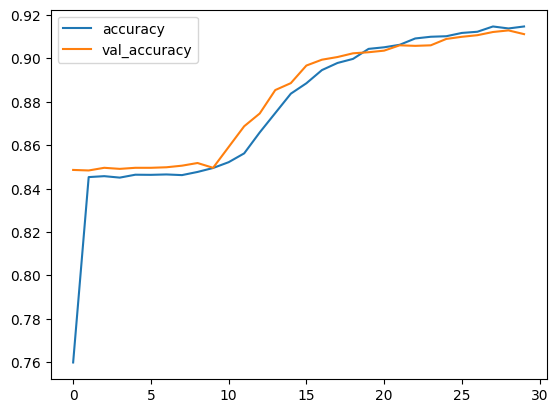

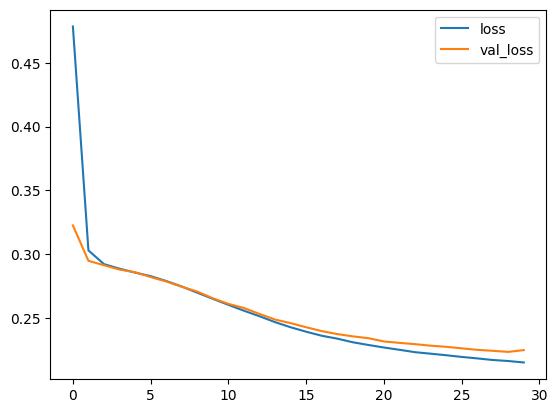

In [48]:
# Plot Traning Results

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

In [49]:
y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

73/73 [==============================] - 0s 923us/step
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1051
           1       0.92      0.92      0.92      1263

    accuracy                           0.91      2314
   macro avg       0.91      0.91      0.91      2314
weighted avg       0.91      0.91      0.91      2314



pada base model sequential mendapatkan nilai accuracy sebesar 0.91 dan nilai recall pada label 1 sebesar 0.92, model ini sudah tergolong bagus karena dari garis accuracy dan val_accuracy berdempetan dan garis loss dengan val_loss menuju ke arah 0

# Functional API

## Model Definition

In [50]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [51]:
#Functional model
input_layer = Input(shape=(18,))
hidden_layer1 = Dense(10, activation='relu')(input_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer1)
model_functional = Model(inputs=input_layer, outputs=output_layer)

## Model Training

In [52]:
# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

history_func = model_functional.fit(df_train,
                                    epochs=30,
                                    validation_data=df_val,
                                    batch_size=32)

Epoch 1/30
611/611 [==============================] - 1s 1ms/step - loss: 0.4421 - accuracy: 0.7812 - val_loss: 0.3059 - val_accuracy: 0.8518
Epoch 2/30
611/611 [==============================] - 1s 1ms/step - loss: 0.2982 - accuracy: 0.8461 - val_loss: 0.2929 - val_accuracy: 0.8496
Epoch 3/30
611/611 [==============================] - 1s 1ms/step - loss: 0.2919 - accuracy: 0.8467 - val_loss: 0.2900 - val_accuracy: 0.8503
Epoch 4/30
611/611 [==============================] - 1s 1ms/step - loss: 0.2892 - accuracy: 0.8464 - val_loss: 0.2879 - val_accuracy: 0.8503
Epoch 5/30
611/611 [==============================] - 1s 1ms/step - loss: 0.2875 - accuracy: 0.8461 - val_loss: 0.2865 - val_accuracy: 0.8496
Epoch 6/30
611/611 [==============================] - 1s 1ms/step - loss: 0.2856 - accuracy: 0.8462 - val_loss: 0.2848 - val_accuracy: 0.8499
Epoch 7/30
611/611 [==============================] - 1s 1ms/step - loss: 0.2845 - accuracy: 0.8459 - val_loss: 0.2839 - val_accuracy: 0.8499
Epoch 

In [53]:
model_functional.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense (Dense)               (None, 10)                190       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


## Model Evaluation

In [54]:
# Create DataFrame

history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.442069,0.781170,0.305949,0.851816
1,0.298154,0.846060,0.292860,0.849607
2,0.291919,0.846667,0.290046,0.850343
3,0.289196,0.846364,0.287878,0.850343
4,0.287528,0.846060,0.286519,0.849607
5,0.285611,0.846182,0.284761,0.849853
6,0.284458,0.845878,0.283861,0.849853
7,0.283102,0.845514,0.282581,0.849607
8,0.281686,0.845696,0.281521,0.849607
9,0.281352,0.846000,0.280614,0.849607


<AxesSubplot: >

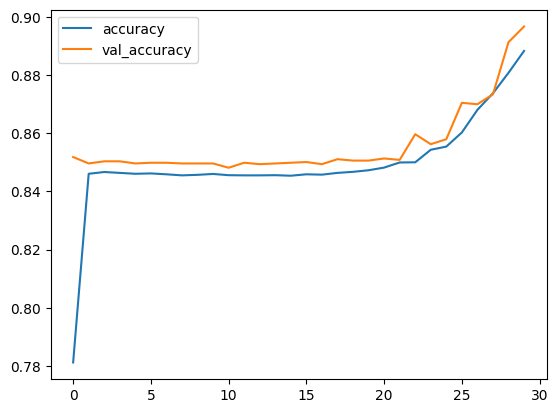

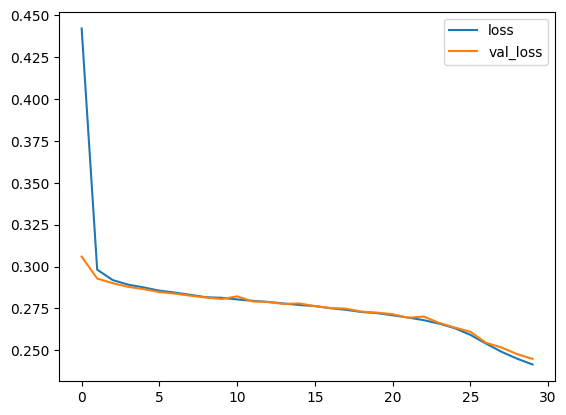

In [55]:
# Plot Training Results

history_func_df[['accuracy', 'val_accuracy']].plot()
history_func_df[['loss', 'val_loss']].plot()

In [56]:
# Evaluate Test-Set
y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >=0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

73/73 [==============================] - 0s 831us/step
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1051
           1       0.90      0.89      0.90      1263

    accuracy                           0.89      2314
   macro avg       0.89      0.89      0.89      2314
weighted avg       0.89      0.89      0.89      2314



pada base model functional mendapatkan nilai accuracy sebesar 0.89 dan nilai recall pada label 1 sebesar 0.89, performance model ini kurang bagus karena garis val_accuracy lebih tinggi dari accuracy sehingga menyebabkan model ini underfitting

# Model Improvement

## Sequential

In [57]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [58]:
model_seq_imp = Sequential()
model_seq_imp.add(Dense(10, activation="relu", input_shape=(18,))) # hidden layer 1
model_seq_imp.add(Dense(8, activation="relu")) # hidden layer 2
model_seq_imp.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_seq_imp.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])



In [59]:
# Train the Model
history_seq_imp = model_seq_imp.fit(df_train,
                                   epochs=50,
                                   validation_data=df_val,
                                   batch_size=32
                                   )

Epoch 1/50
611/611 [==============================] - 1s 1ms/step - loss: 0.3912 - accuracy: 0.8204 - val_loss: 0.3009 - val_accuracy: 0.8479
Epoch 2/50
611/611 [==============================] - 1s 1ms/step - loss: 0.2961 - accuracy: 0.8466 - val_loss: 0.2896 - val_accuracy: 0.8501
Epoch 3/50
611/611 [==============================] - 1s 1ms/step - loss: 0.2881 - accuracy: 0.8467 - val_loss: 0.2846 - val_accuracy: 0.8501
Epoch 4/50
611/611 [==============================] - 1s 1ms/step - loss: 0.2823 - accuracy: 0.8472 - val_loss: 0.2834 - val_accuracy: 0.8481
Epoch 5/50
611/611 [==============================] - 1s 1ms/step - loss: 0.2781 - accuracy: 0.8484 - val_loss: 0.2774 - val_accuracy: 0.8511
Epoch 6/50
611/611 [==============================] - 1s 1ms/step - loss: 0.2740 - accuracy: 0.8501 - val_loss: 0.2732 - val_accuracy: 0.8540
Epoch 7/50
611/611 [==============================] - 1s 1ms/step - loss: 0.2699 - accuracy: 0.8518 - val_loss: 0.2694 - val_accuracy: 0.8528
Epoch 

In [60]:
model_seq_imp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                190       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 287
Trainable params: 287
Non-trainable params: 0
_________________________________________________________________


In [61]:
history_seq_imp_df = pd.DataFrame(history_seq_imp.history)
history_seq_imp_df

,loss,accuracy,val_loss,val_accuracy
0,0.391207,0.820444,0.300907,0.847890
1,0.296143,0.846607,0.289632,0.850098
2,0.288112,0.846728,0.284597,0.850098
3,0.282322,0.847153,0.283441,0.848135
4,0.278051,0.848428,0.277397,0.851079
5,0.273990,0.850127,0.273246,0.854024
6,0.269856,0.851827,0.269395,0.852797
7,0.265189,0.855955,0.264809,0.854269
8,0.258844,0.861843,0.258136,0.865800
9,0.249956,0.879325,0.253694,0.892787


<AxesSubplot: >

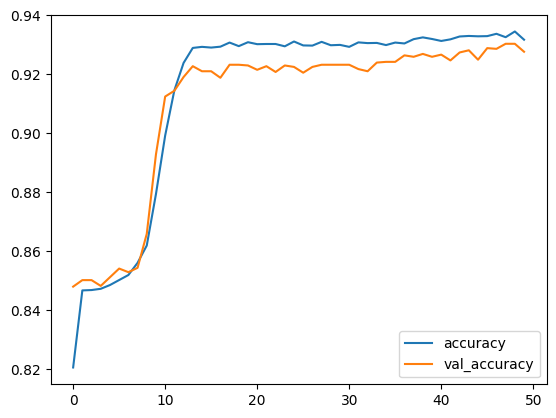

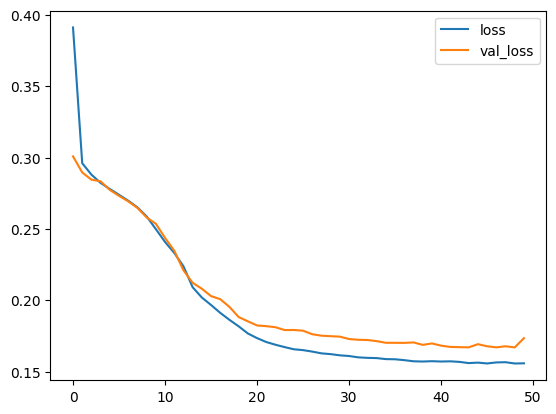

In [62]:
# Plot Traning Results

history_seq_imp_df[['accuracy', 'val_accuracy']].plot()
history_seq_imp_df[['loss', 'val_loss']].plot()

In [63]:
y_pred_seq_imp = model_seq_imp.predict(X_test)
y_pred_seq_imp = np.where(y_pred_seq_imp >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq_imp))

73/73 [==============================] - 0s 867us/step
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1051
           1       0.95      0.92      0.93      1263

    accuracy                           0.93      2314
   macro avg       0.93      0.93      0.93      2314
weighted avg       0.93      0.93      0.93      2314



pada model sequential yang sudah di improve mendapatkan nilai accuracy sebesar 0.93 dan nilai recall pada label 1 sebesar 0.92, model ini sudah tergolong bagus karena dari garis accuracy dan val_accuracy berdempetan dan garis loss dengan val_loss menuju ke arah 0

## Functional

In [64]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [65]:
# Create Functional Model

input_layer_imp = Input(shape=(18,))
hidden_layer1_imp = Dense(10, activation='relu')(input_layer_imp)
hidden_layer2_imp = Dense(10, activation='relu')(hidden_layer1_imp)
hidden_layer3_imp = Dense(8, activation='relu')(hidden_layer2_imp)


concat_layer_imp = concatenate([input_layer_imp, hidden_layer3_imp])
output_layer_imp = Dense(1, activation='sigmoid')(concat_layer_imp)

model_func_imp = Model(inputs=input_layer_imp, outputs=output_layer_imp)

# Compile
model_func_imp.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

In [66]:
# Train the Model
history_func_imp = model_func_imp.fit(df_train,
                                   epochs=50,
                                   validation_data=df_val,
                                   batch_size=32)

Epoch 1/50
611/611 [==============================] - 1s 2ms/step - loss: 0.4025 - accuracy: 0.8049 - val_loss: 0.2981 - val_accuracy: 0.8476
Epoch 2/50
611/611 [==============================] - 1s 2ms/step - loss: 0.2922 - accuracy: 0.8459 - val_loss: 0.2918 - val_accuracy: 0.8469
Epoch 3/50
611/611 [==============================] - 1s 2ms/step - loss: 0.2868 - accuracy: 0.8481 - val_loss: 0.2861 - val_accuracy: 0.8496
Epoch 4/50
611/611 [==============================] - 1s 2ms/step - loss: 0.2825 - accuracy: 0.8479 - val_loss: 0.2811 - val_accuracy: 0.8481
Epoch 5/50
611/611 [==============================] - 1s 1ms/step - loss: 0.2734 - accuracy: 0.8507 - val_loss: 0.2706 - val_accuracy: 0.8499
Epoch 6/50
611/611 [==============================] - 1s 1ms/step - loss: 0.2574 - accuracy: 0.8655 - val_loss: 0.2534 - val_accuracy: 0.8835
Epoch 7/50
611/611 [==============================] - 1s 1ms/step - loss: 0.2376 - accuracy: 0.8950 - val_loss: 0.2350 - val_accuracy: 0.9073
Epoch 

In [67]:
model_func_imp.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 18)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 10)           190         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 10)           110         ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 8)            88          ['dense_1[0][0]']                
                                                                                              

In [68]:
model_func_imp_df = pd.DataFrame(history_func_imp.history)
model_func_imp_df

,loss,accuracy,val_loss,val_accuracy
0,0.402511,0.804905,0.298106,0.847645
1,0.292245,0.845878,0.291763,0.846909
2,0.286847,0.848124,0.286102,0.849607
3,0.282473,0.847881,0.281061,0.848135
4,0.273396,0.850734,0.270566,0.849853
5,0.257429,0.865546,0.253450,0.883464
6,0.237650,0.895047,0.235039,0.907262
7,0.221107,0.913318,0.223911,0.911187
8,0.209505,0.919327,0.210358,0.918548
9,0.200235,0.923030,0.204096,0.919529


<AxesSubplot: >

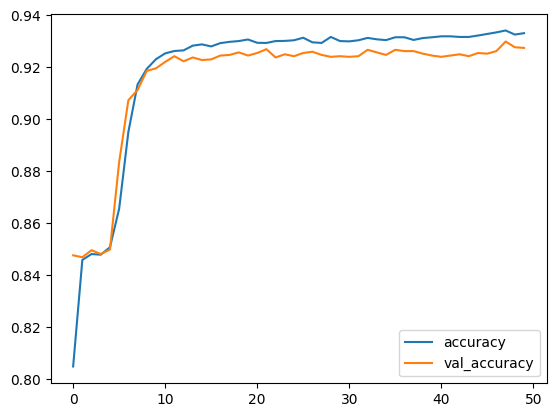

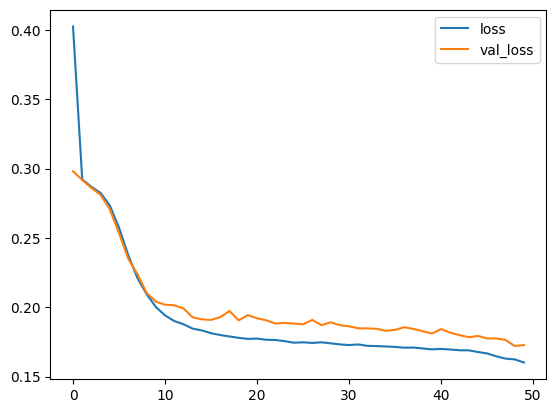

In [69]:
# Plot Traning Results

model_func_imp_df[['accuracy', 'val_accuracy']].plot()
model_func_imp_df[['loss', 'val_loss']].plot()

In [70]:
y_pred_func_imp = model_func_imp.predict(X_test)
y_pred_func_imp = np.where(y_pred_func_imp >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func_imp))

73/73 [==============================] - 0s 937us/step
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1051
           1       0.93      0.92      0.93      1263

    accuracy                           0.92      2314
   macro avg       0.92      0.92      0.92      2314
weighted avg       0.92      0.92      0.92      2314



pada model functional yang sudah di improve mendapatkan nilai accuracy sebesar 0.92 dan nilai recall pada label 1 sebesar 0.92, performance model ini sudah bagus karena dari garis accuracy dan val_accuracy berdempetan dan garis loss dengan val_loss menuju ke arah 0

# Model Saving

In [82]:
# Save Pipeline
with open('pipeline.pkl', 'wb') as file_1:
  pickle.dump(final_pipeline, file_1)

In [87]:
# Freezing
model_seq_imp.trainable = False
model_seq_imp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                190       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 287
Trainable params: 0
Non-trainable params: 287
_________________________________________________________________


In [88]:
# Save ANN Model

model_seq_imp.save('seqimp_model.h5')

# Model Inference

model inference dibuat terpisah, terdapat pada inference.ipynb

# Pengambilan Kesimpulan

Dataset yang digunakan pada project ini adalah data pelanggan dari perusahaan layanan internet untuk memprediksi apakah pelanggan akan churn atau tidak, dari hasil EDA pelanggan yang churn memiliki persentasi sebesar 54% dan yang not churn 46%, diketahui juga kebanyakan pelanggan yang churn adalah bukan membership sebanyak 7467 pelanggan dan basic membership sebanyak 7476 pelanggan, dan diketahui juga  pelanggan yang churn kebanyakan memberikan feedback yang negatif seperti poor website, poor customer service, too many ads, poor product quality, pelanggan yang tidak churn kebanyakan adalah pelanggan yang memiliki feedback positif seperti produck always in stock, reasonable price, quality customer care, user friendly, untuk pelanggan yang memiliki member premium dan platinum tidak ada yang churn.

## Model analysis

Untuk base model sequential saya menggunakan :
- menggunakan 1 hidden layers dengan 10 neuron
- menggunakan aktivasi relu 
- menggunakan 1 output layer dengan 1 neuron dan aktivasi sigmoid
- epoch 30
model ini mendapatkan nilai accuracy sebesar 0.91 dan nilai recall pada label 1 sebesar 0.92

base model functional
- 1 input layer
- 1 hidden layer dengan 10 neuron dan aktivasi relu
- output layer dengan 1 neuron dan aktivasi sigmoid
- epoch 30
model ini mendapatkan nilai accuracy sebesar 0.89 dan nilai recall pada label 1 sebesar 0.89

model improvement sequential
- 2 hidden layer dengan 10 dan 8 neuron
- kedua hidden layer menggunakan aktivasi relu
- menggunakan 1 output layer dengan 1 neuron dan aktivasi sigmoid
- epoch 50
model ini mendapatkan nilai accuracy sebesar 0.93 dan nilai recall pada label 1 sebesar 0.92

model improvement Functional
- 1 input layer
- 3 hidden layer dengan 10, 10, 8 neuron
- ketiga hidden layer menggunakan relu
- 1 output layer dengan 1 neuron menggunakan sigmoid
- epoch 50
model ini mendapatkan nilai accuracy sebesar 0.92 dan nilai recall pada label 1 sebesar 0.92

pada model improvement kedua model mengalami kenaikan performance dari segi akurasi, pada base model sequential dari asalnya akurasi sebesar 0.91 menjadi 0.93 setelah di improve, pada base model functional dari asalnya memiliki akurasi 0.89 menjadi 0.92 setelah di improve sekaligus merubah model yang asalnya underfit menjadi goodfit, dari hasil modeling akurasi terbesar ada pada model sequential dengan akurasi 0.93, sehingga model tersebut akan dijadikan model untuk data inference dan model deployment.

Note: semua model di compile menggunakan, loss= binary_crossentropy, optimizer= adam dan metrics= accuracy